# ŒßœÅŒøŒΩŒøœÉŒµŒπœÅŒ≠œÇ Lorentz

## 1. ŒïŒ≥Œ∫Œ±œÑŒ¨œÉœÑŒ±œÉŒ∑ Œ≤ŒπŒ≤ŒªŒπŒøŒ∏Œ∑Œ∫œéŒΩ
#### NumPy ‚Üí œÑŒ±œáœçœÇ œáŒµŒπœÅŒπœÉŒºœåœÇ œÄŒπŒΩŒ¨Œ∫œâŒΩ.
#### SciPy ‚Üí Œ≠œÑŒøŒπŒºŒøŒπ ŒøŒªŒøŒ∫ŒªŒ∑œÅœâœÑŒ≠œÇ ODE (œÄ.œá. solve_ivp).
#### Matplotlib ‚Üí Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒ± 2-D & 3-D.
#### pandas ‚Üí ŒµœÖŒ≠ŒªŒπŒ∫œÑŒø data container (DataFrame).


In [9]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp        # ŒµŒΩŒ±ŒªŒªŒ±Œ∫œÑŒπŒ∫Œ¨: from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pyrcn.echo_state_network import ESNRegressor
from numpy import array
import math
import csv

## 2. ŒüœÅŒπœÉŒºœåœÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ & ŒµŒæŒπœÉœéœÉŒµœâŒΩ Lorenz
#### ŒµŒæŒπœÉœéœÉŒµŒπœÇ Lorentz:
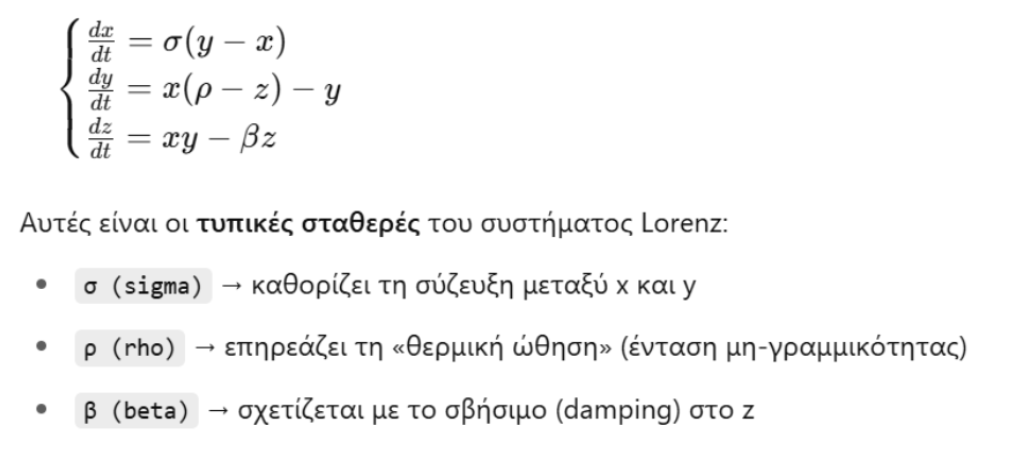

In [10]:
# Œ†Œ±œÅŒ¨ŒºŒµœÑœÅŒøŒπ
sigma = 10.0          # Œ≠ŒΩœÑŒ±œÉŒ∑ ¬´œÄŒµœÅŒπœÉœÑœÅŒøœÜŒπŒ∫Œøœç¬ª œåœÅŒøœÖ (œÉœáŒµœÑŒπŒ∫œå ŒºŒµ Prandtl)
beta  = 8.0 / 3.0     # Œ≥ŒµœâŒºŒµœÑœÅŒπŒ∫œåœÇ/Œ±Œ≥œéŒ≥ŒπŒºŒøœÇ œÉœÖŒΩœÑŒµŒªŒµœÉœÑŒÆœÇ
rho   = 28.0          # ¬´Œ∏ŒµœÅŒºŒπŒ∫ŒÆ œéŒ∏Œ∑œÉŒ∑¬ª (Rayleigh number)

# 3.2 Œ£œÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ œÄŒøœÖ Œ¥ŒØŒΩŒµŒπ œÑŒ± œÄŒ±œÅŒ¨Œ≥œâŒ≥Œ±
def lorenz(t, state):
    """
    t      : œÑœÅŒ≠œáœâŒΩ œáœÅœåŒΩŒøœÇ (float, Œ±ŒªŒªŒ¨ Œ¥ŒµŒΩ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒµŒØœÑŒ±Œπ œÅŒ∑œÑŒ¨)
    state  : Œ¥ŒπŒ¨ŒΩœÖœÉŒºŒ± [x, y, z] œÑŒ∑ œáœÅŒøŒΩŒπŒ∫ŒÆ œÉœÑŒπŒ≥ŒºŒÆ t
    return : ŒªŒØœÉœÑŒ± [dx/dt, dy/dt, dz/dt]
    """
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

## 3. Œ°œçŒ∏ŒºŒπœÉŒ∑ œáœÅŒøŒΩŒπŒ∫Œøœç œÄŒªŒ≠Œ≥ŒºŒ±œÑŒøœÇ & Œ±œÅœáŒπŒ∫œéŒΩ œÉœÖŒΩŒ∏Œ∑Œ∫œéŒΩ


In [11]:
t0, t_end, dt = 0.0, 500, 0.01       # Œ±œÄœå 0 œâœÇ 50 "Œ¥ŒµœÖœÑŒµœÅœåŒªŒµœÄœÑŒ±" ŒºŒµ Œ≤ŒÆŒºŒ± 0.01
t_eval = np.arange(t0, t_end + dt, dt)  # œÉŒ∑ŒºŒµŒØŒø-œÉŒ∑ŒºŒµŒØŒø ŒµŒæŒ±Œ≥œâŒ≥ŒÆœÇ

initial_state = [1.0, 1.0, 1.0]       # x0, y0, z0

## 4. ŒëœÅŒπŒ∏ŒºŒ∑œÑŒπŒ∫ŒÆ ŒøŒªŒøŒ∫ŒªŒÆœÅœâœÉŒ∑
## H solve_ivp(solve initial value problem) ŒµŒØŒΩŒ±Œπ ŒºŒπŒ± œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ Œ±œÄŒø œÑŒø scipy.integrate œÄŒøœÖ ŒµœÄŒπŒªœçŒµŒπ œÉœÖœÉœÑŒÆŒºŒ±œÑŒ± Œ¥ŒπŒ±œÜŒøœÅŒπŒ∫œéŒΩ ŒµŒæŒπœÉœéœÉŒµœâŒΩ œÄœÅœéœÑŒ∑œÇ œÑŒ¨ŒæŒ∑œÇ

In [12]:
sol = solve_ivp(
    lorenz,                # Œ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ ŒºŒµ œÑŒ± œÄŒ±œÅŒ¨Œ≥œâŒ≥Œ±
    (t0, t_end),           # œáœÅŒøŒΩŒπŒ∫œå Œ¥ŒπŒ¨œÉœÑŒ∑ŒºŒ± ŒøŒªŒøŒ∫ŒªŒÆœÅœâœÉŒ∑œÇ
    initial_state,         # Œ±œÅœáŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ
    method="RK45",         # Dormand‚ÄìPrince 4(5)
    t_eval=t_eval,         # œÄŒøœç Œ∏ŒµœÇ Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±
    rtol=1e-9, atol=1e-12  # Œ≠ŒªŒµŒ≥œáŒøœÇ œÉœÜŒ¨ŒªŒºŒ±œÑŒøœÇ
)

In [13]:
t = sol.t
x, y, z = sol.y          # "ŒæŒµŒ¥ŒπœÄŒªœéŒΩŒøœÖŒºŒµ" œÑŒπœÇ œÑœÅŒµŒπœÇ œáœÅŒøŒΩŒøœÉŒµŒπœÅŒ≠œÇ

## 5. ŒúŒµœÑŒ±œÑœÅŒøœÄŒÆ œÉŒµ DataFrame


In [14]:
df = (
    pd.DataFrame({"t": t, "x": x, "y": y, "z": z})
      .set_index("t")        # œáœÅœåŒΩŒøœÇ œâœÇ index ‚áí Œ≠œÑŒøŒπŒºŒø Œ≥ŒπŒ± resample/rolling
)
df.head(-1)                    # Œ¥ŒµŒØœáŒΩŒµŒπ œÑŒπœÇ 5 œÄœÅœéœÑŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ

x         y          z
t                                    
0.00    1.000000  1.000000   1.000000
0.01    1.012566  1.259920   0.984891
0.02    1.048821  1.524001   0.973114
0.03    1.107206  1.798315   0.965159
0.04    1.186865  2.088546   0.961737
...          ...       ...        ...
499.95  2.303042  1.617246  21.334800
499.96  2.244527  1.757772  20.811212
499.97  2.205271  1.904950  20.303749
499.98  2.184100  2.059340  19.812359
499.99  2.180015  2.221698  19.337065

[50000 rows x 3 columns]

## 6. ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ œáœÅŒøŒΩŒøœÉŒµŒπœÅœéŒΩ


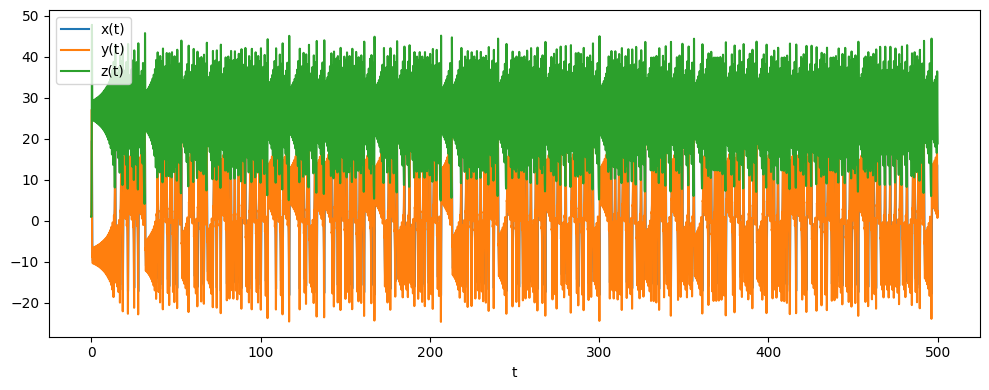

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["x"], label="x(t)")
plt.plot(df.index, df["y"], label="y(t)")
plt.plot(df.index, df["z"], label="z(t)")
plt.xlabel("t"), plt.legend(), plt.tight_layout()
plt.show()

## ŒïŒªŒ∫œÖœÉœÑŒÆœÇ (¬´œÄŒµœÑŒ±ŒªŒøœçŒ¥Œ±¬ª)
### ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒµŒØ œÑœÅŒπœÉŒ¥ŒπŒ¨œÉœÑŒ±œÑŒø Œ¥ŒπŒ¨Œ≥œÅŒ±ŒºŒºŒ± œÑŒ∑œÇ œÑœÅŒøœáŒπŒ¨œÇ œÑŒøœÖ œÉœÖœÉœÑŒÆŒºŒ±œÑŒøœÇ Lorenz œÉœÑŒøŒΩ œáœéœÅŒø œÑœâŒΩ ŒºŒµœÑŒ±Œ≤ŒªŒ∑œÑœéŒΩ (x, y, z) ‚Äî Œ¥Œ∑ŒªŒ±Œ¥ŒÆ ŒøœÄœÑŒπŒ∫ŒøœÄŒøŒπŒµŒØ œÑŒø Œ¥ŒπŒ¨œÉŒ∑ŒºŒø ‚ÄúLorenz attractor‚Äù.


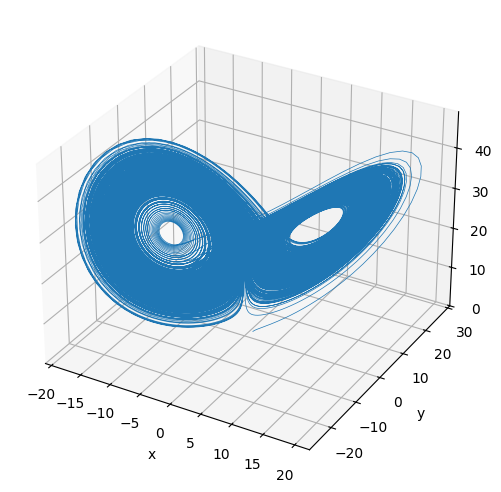

In [16]:
from mpl_toolkits.mplot3d import Axes3D  # ŒºœåŒΩŒø Œ≥ŒπŒ± ŒΩŒ± ŒµŒΩŒµœÅŒ≥ŒøœÄŒøŒπŒ∑Œ∏ŒµŒØ œÑŒø 3-D
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(projection="3d")
ax.plot(x, y, z, linewidth=0.5)
ax.set_xlabel("x"), ax.set_ylabel("y"), ax.set_zlabel("z")
plt.tight_layout(); plt.show()

# ŒîŒøŒºŒÆ Œ†œÅœåŒ≤ŒªŒ≠œàŒ∑ œÄŒøŒªŒªœéŒΩ Œ≤Œ∑ŒºŒ¨œÑœâŒΩ ŒºŒµ Œ∫œÖŒªŒπœåŒºŒµŒΩŒø œÄŒ±œÅŒ¨Œ∏œÖœÅŒø (Sliding Window Multi-Step Forecasting)
## Œ£Œ∫ŒøœÄœåœÇ: Œó Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒøœÇ ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑œÇ Œ±œÄœå œÑŒ∑ŒΩ Œ±œÅœáŒπŒ∫ŒÆ œáœÅŒøŒΩŒøœÉŒµŒπœÅŒ¨ x(t)
#         ŒìŒπŒ± Œ∫Œ¨Œ∏Œµ œáœÅŒøŒΩŒπŒ∫ŒÆ œÉœÑŒπŒ≥ŒºŒÆ t: Œ§Œø reservoir Œ¥Œ≠œáŒµœÑŒ±Œπ œÉœÑŒ∑ŒΩ ŒµŒØœÉŒøŒ¥Œø Œ≠ŒΩŒ± Œ¥ŒπŒ¨ŒΩœÖœÉŒºŒ± D œÄœÅŒøŒ∑Œ≥ŒøœçŒºŒµŒΩœâŒΩ œÑŒπŒºœéŒΩ (ŒπœÉœÑŒøœÅŒπŒ∫œå œÄŒ±œÅŒ¨Œ∏œÖœÅŒø) , Œ∫Œ±Œπ Œ¥ŒØŒΩŒµŒπ œÉœÑŒ∑ŒΩ Œ≠ŒæŒøŒ¥Œø Œ≠ŒΩŒ± Œ¥ŒπŒ¨ŒΩœÖœÉŒºŒ± (Target) F ŒºŒµŒªŒøŒΩœÑŒπŒ∫œéŒΩ œÑŒπŒºœéŒΩ:



### windows: œÑŒ± œÄŒ±œÅŒ±Œ∏œÖœÅŒπŒ∫Œ¨ inputs (ŒπœÉœÑŒøœÅŒπŒ∫œå 50 œÑŒπŒºœéŒΩ)

### future_windows : œÑŒ± Œ±ŒΩœÑŒØœÉœÑŒøŒπœáŒ± multi-step targets (140 œÑŒπŒºŒ≠œÇ)

### prices: Œ∑ œÑŒµŒªŒµœÖœÑŒ±ŒØŒ± œÑŒπŒºŒÆ Œ∫Œ¨Œ∏Œµ ŒµŒπœÉœåŒ¥ŒøœÖ (œáœÅŒÆœÉŒπŒºŒ∑ Œ≥ŒπŒ± Œ∫Œ±ŒΩŒøŒΩŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑)



In [88]:
import numpy as np

# ŒàœÉœÑœâ df['x'] Œ≠œáŒµŒπ N œÑŒπŒºŒ≠œÇ
input_window   = 50
forecast_horizon = 140

X_ins    = []
y_targets = []
prices   = []

for i in range(len(df)):
    end = i + input_window + forecast_horizon
    if end > len(df):
        break  # Œ¥ŒµŒΩ œÖœÄŒ¨œÅœáŒøœÖŒΩ Œ¨ŒªŒªŒ± full windows

    # Œ†Œ±œÅŒ¨Œ∏œÖœÅŒø ŒπœÉœÑŒøœÅŒπŒ∫Œøœç + ŒºŒ≠ŒªŒªŒøŒΩœÑŒøœÇ
    seq_full = df['x'].iloc[i:end].reset_index(drop=True)

    # Input: œÄœÅœéœÑŒµœÇ 50 œÑŒπŒºŒ≠œÇ
    seq_input = seq_full[:input_window]
    X_ins.append(seq_input.values)  # ŒÆ np.array(seq_input)

    # Target: ŒµœÄœåŒºŒµŒΩŒµœÇ 800 œÑŒπŒºŒ≠œÇ
    seq_target = seq_full[input_window:]
    y_targets.append(seq_target.values)

    # ŒìŒπŒ± normalization
    prices.append(seq_input.iloc[-1].item())

# Œ§ŒµŒªŒπŒ∫ŒøŒØ œÄŒØŒΩŒ±Œ∫ŒµœÇ
X = np.array(X_ins)      # shape = (N - 50 - 800 + 1, 50)
Y = np.array(y_targets)  # shape = (N - 50 - 800 + 1, 800

## ŒïŒ¥œé Œ∫Œ¨ŒΩŒøœÖŒºŒµ Œ≠ŒΩŒ±ŒΩ Œ≠ŒªŒµŒ≥œáŒø Œ≥ŒπŒ± ŒΩŒ± Œ¥ŒøœçŒºŒµ œåœÑŒπ Œ≠œáŒøœÖŒºŒµ œÜœÑŒπŒ¨ŒæŒµŒπ œÑŒ± œÄŒ±œÅŒ¨Œ∏œÖœÅŒ±  ŒºŒµ œÑŒπœÇ 50 œÑŒπŒºŒ≠œÇ œÑŒøœÖ œÄŒ±œÅŒµŒªŒ∏œåŒΩœÑŒøœÇ

In [18]:
X[0]

array([ 1.        ,  1.01256573,  1.04882146,  1.10720628,  1.18686546,
        1.28755477,  1.40956882,  1.5536888 ,  1.72114581,  1.91359641,
        2.13310762,  2.38214829,  2.66358398,  2.98067178,  3.33705076,
        3.73672255,  4.18401471,  4.68351714,  5.23997858,  5.85814631,
        6.54252756,  7.29704609,  8.12456357,  9.02623332, 10.00065888,
       11.04284424, 12.14295555, 13.28497092, 14.44538183, 15.59222175,
       16.68481397, 17.67470312, 18.50818988, 19.13065243, 19.49238414,
       19.55509438, 19.29772909, 18.72015022, 17.84363409, 16.70800941,
       15.36620006, 13.87755803, 12.30145373, 10.69220603,  9.09584397,
        7.54865859,  6.07717314,  4.69904504,  3.42445082,  2.2576159 ])

In [19]:
df['x'].head(50)

t
0.00     1.000000
0.01     1.012566
0.02     1.048821
0.03     1.107206
0.04     1.186865
0.05     1.287555
0.06     1.409569
0.07     1.553689
0.08     1.721146
0.09     1.913596
0.10     2.133108
0.11     2.382148
0.12     2.663584
0.13     2.980672
0.14     3.337051
0.15     3.736723
0.16     4.184015
0.17     4.683517
0.18     5.239979
0.19     5.858146
0.20     6.542528
0.21     7.297046
0.22     8.124564
0.23     9.026233
0.24    10.000659
0.25    11.042844
0.26    12.142956
0.27    13.284971
0.28    14.445382
0.29    15.592222
0.30    16.684814
0.31    17.674703
0.32    18.508190
0.33    19.130652
0.34    19.492384
0.35    19.555094
0.36    19.297729
0.37    18.720150
0.38    17.843634
0.39    16.708009
0.40    15.366200
0.41    13.877558
0.42    12.301454
0.43    10.692206
0.44     9.095844
0.45     7.548659
0.46     6.077173
0.47     4.699045
0.48     3.424451
0.49     2.257616
Name: x, dtype: float64

## ŒïŒ¥œé Œ∫Œ¨ŒΩŒøœÖŒºŒµ Œ≠ŒΩŒ±ŒΩ Œ≠ŒªŒµŒ≥œáŒø Œ≥ŒπŒ± ŒΩŒ± Œ¥ŒøœçŒºŒµ œåœÑŒπ Œ≠œáŒøœÖŒºŒµ œÜœÑŒπŒ¨ŒæŒµŒπ œÑŒ± œÄŒ±œÅŒ¨Œ∏œÖœÅŒ±  ŒºŒµ œÑŒπœÇ 140 œÑŒπŒºŒ≠œÇ œÉœÑŒø ŒºŒ≠ŒªŒªŒøŒΩ

In [20]:
Y[0]

array([ 1.19827297,  0.24293545, -0.61405564, -1.37970945, -2.06176305,
       -2.66822606, -3.2070582 , -3.68594946, -4.1121773 , -4.49252057,
       -4.83321401, -5.13993163, -5.41778959, -5.67136211, -5.90470557,
       -6.12138719, -6.32451591, -6.51677357, -6.70044548, -6.87744925,
       -7.04936183, -7.21744418, -7.38266388, -7.54571558, -7.70703967,
       -7.86683948, -8.02509751, -8.18159095, -8.3359074 , -8.48746093,
       -8.6355093 , -8.7791727 , -8.9174544 , -9.04926381, -9.17344196,
       -9.28878941, -9.39409657, -9.48817579, -9.56989472, -9.63821007,
       -9.6922007 , -9.73109886, -9.7543184 , -9.76147858, -9.75242266,
       -9.72722999, -9.68622125, -9.62995632, -9.55922506, -9.47503115,
       -9.37857001, -9.27120172, -9.15442019, -9.02982007, -8.89906267,
       -8.7638423 , -8.62585429, -8.48676553, -8.34818847, -8.21165901,
       -8.07861859, -7.95040049, -7.82822033, -7.71317031, -7.60621689,
       -7.50820141, -7.41984307, -7.34174382, -7.27439458, -7.21

In [21]:
df.head(190)

x         y          z
t                                  
0.00  1.000000  1.000000   1.000000
0.01  1.012566  1.259920   0.984891
0.02  1.048821  1.524001   0.973114
0.03  1.107206  1.798315   0.965159
0.04  1.186865  2.088546   0.961737
...        ...       ...        ...
1.85 -7.019591 -6.969366  25.314060
1.86 -7.020749 -7.093956  25.134933
1.87 -7.034190 -7.229541  24.970056
1.88 -7.059756 -7.375374  24.820689
1.89 -7.097232 -7.530667  24.688051

[190 rows x 3 columns]

## Œ£œÑŒÆ œÉœÖŒΩŒ≠œáŒµŒπŒ± ŒµŒªŒ≠Œ≥œáŒøœÖŒºŒµ ŒΩŒ± Œ≠œáŒøœÖŒΩ ŒØŒ¥ŒπŒø ŒºŒÆŒ∫ŒøœÇ œÑŒ± input(windows) ŒºŒµ œÑŒ± target(future_windows)

In [22]:
print(len(X))
print(len(Y))

49812
49812


## ŒîŒπŒ±œáœâœÅŒπœÉŒºœåœÇ œÉŒµ training set & test set
### Œ§Œø œÄœÅœéœÑŒø 80% Œ∏Œ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒ∑Œ∏ŒµŒØ Œ≥ŒπŒ± œÑŒø training set

In [23]:
#ŒîŒπŒ±œáœâœÅŒπœÉŒºœåœÇ œÉŒµ training set Œ∫Œ±Œπ test set
ts = round(len(X)*0.8)
#inputs

# œÑŒø œÄœÅœéœÑŒø 80% train set Œ∫Œ±Œπ œÑŒø œÖœÄœåŒªŒøŒπœÄŒø test set
train_set = X[:ts]
test_set = X[ts:]

#outputs

y_train = y_targets[:ts]
y_test = y_targets[ts:]

# Œø ŒªœåŒ≥ŒøœÇ œÄŒøœÖ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒºŒµ numpy vectors ŒµŒØŒΩŒ±Œπ Œ≥ŒπŒ±œÑŒØ œÄŒøŒªŒªŒ≠œÇ Œ≤ŒπŒ≤ŒªŒπŒøŒÆŒ∫ŒµœÇ ML œÑŒ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒΩ
y_train = np.array(y_train)
y_test = np.array(y_test)
prices = np.array(prices)           # œÉœáŒÆŒºŒ± = (49152,)
prices_train = prices[len(y_train):]  # œÄ.œá. 49152 train samples
prices_test  = prices[:len(y_test)]  # œÄ.œá.  9830 test samples


## ŒïŒπœÉŒ¨Œ≥ŒøœÖŒºŒµ Œ∫Œ¨œÄŒøŒπŒµœÇ Œ≤ŒπŒ≤ŒªŒπŒøŒ∏ŒÆŒ∫ŒµœÇ
### 1) from sklearn.linear_model import Ridge
### Œó œÄŒ±ŒªŒπŒΩŒ¥œÅœåŒºŒ∑œÉŒ∑ Ridge Œ∏Œ± ŒµŒØŒΩŒ±Œπ œÑŒø read‚Äêout layer: Œ≠ŒΩŒ± Œ≥œÅŒ±ŒºŒºŒπŒ∫œå ŒºŒøŒΩœÑŒ≠ŒªŒø ŒºŒµ L‚ÇÇ Œ∫Œ±ŒΩŒøŒΩŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑,
### œÄŒøœÖ ŒºŒ±Œ∏Œ±ŒØŒΩŒµŒπ ŒΩŒ± œáŒ±œÅœÑŒøŒ≥œÅŒ±œÜŒµŒØ œÑŒπœÇ Œ∫Œ±œÑŒ±œÉœÑŒ¨œÉŒµŒπœÇ œÑŒøœÖ reservoir œÉœÑŒπœÇ œÑŒπŒºŒ≠œÇ‚ÄêœÉœÑœåœáŒøœÖœÇ.
### 2) from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
### Œ§Œø GridSearchCV ŒµŒ∫œÑŒµŒªŒµŒØ ŒµŒæŒ±ŒΩœÑŒªŒ∑œÑŒπŒ∫ŒÆ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑ œÉŒµ œÄŒªŒ≠Œ≥ŒºŒ± œÖœÄŒµœÅœÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ
### (œÄ.œá. Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫Œ¨ spectral_radius, leakage Œ∫.ŒªœÄ.), œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπœéŒΩœÑŒ±œÇ cross‚Äêvalidation
### Œ≥ŒπŒ± ŒΩŒ± ŒµœÄŒπŒªŒ≠ŒæŒµŒπ œÑŒøŒΩ Œ∫Œ±ŒªœçœÑŒµœÅŒø œÉœÖŒΩŒ¥œÖŒ±œÉŒºœå.
### Œ§Œø TimeSeriesSplit ŒµŒØŒΩŒ±Œπ Œ∫Œ±œÑŒ±ŒºŒµœÅŒπœÉœÑŒÆœÇ cross‚Äêvalidation œÄŒøœÖ Œ¥ŒπŒ±œÑŒ∑œÅŒµŒØ œÑŒ∑ œáœÅŒøŒΩŒøŒªŒøŒ≥ŒπŒ∫ŒÆ œÉŒµŒπœÅŒ¨
### (œáœâœÅŒØœÇ œÑœÖœáŒ±ŒπŒøœÄŒøŒØŒ∑œÉŒ∑), œÄŒ±œÅŒ≠œáŒøŒΩœÑŒ±œÇ œÉœâœÉœÑŒ¨ train/test folds Œ≥ŒπŒ± œáœÅŒøŒΩŒøœÉŒµŒπœÅŒ≠œÇ.
### 3) from sklearn.metrics import make_scorer, mean_squared_error
### Œ§Œø mean_squared_error ŒµŒØŒΩŒ±Œπ Œ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ Œ∫œåœÉœÑŒøœÖœÇ (loss) œÄŒøœÖ Œ∏Œ± ŒµŒªŒ±œáŒπœÉœÑŒøœÄŒøŒπŒÆœÉŒµœÑŒµ.
### Œ§Œø make_scorer(mean_squared_error, greater_is_better=False) œÑŒø ‚ÄúœÑœÖŒªŒØŒ≥ŒµŒπ‚Äù
### œéœÉœÑŒµ ŒΩŒ± ŒºœÄŒøœÅŒµŒØ ŒΩŒ± œÄŒµœÅŒ±œÉœÑŒµŒØ œÉœÑŒø GridSearchCV (Œ±œÄŒ±ŒπœÑŒµŒØ Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø scorer).
### 4) from pyrcn.model_selection import SequentialSearchCV
### ŒàŒΩŒ±œÇ PyRCN‚Äêspecific orchestrator œÄŒøœÖ ŒµŒ∫œÑŒµŒªŒµŒØ Œ¥ŒπŒ±Œ¥ŒøœáŒπŒ∫Œ¨ Œ≤ŒÆŒºŒ±œÑŒ± tuning
### (œÄ.œá. œÄœÅœéœÑŒ± input_scaling, ŒºŒµœÑŒ¨ spectral_radius Œ∫.ŒªœÄ.), œÉœÑŒ±Œ∏ŒµœÅŒøœÄŒøŒπœéŒΩœÑŒ±œÇ 
### Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ œÑŒπœÇ Œ∫Œ±ŒªœçœÑŒµœÅŒµœÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅŒøœÖœÇ.
### 5) from pyrcn.metrics import mean_squared_error
### Œó Œ¥ŒπŒ∫ŒÆ œÑŒøœÖ Œ≠Œ∫Œ¥ŒøœÉŒ∑ œÑŒøœÖ MSE œÉœÑŒø PyRCN (ŒØŒ¥ŒπŒ± ŒºŒ±Œ∏Œ∑ŒºŒ±œÑŒπŒ∫Œ¨ Œ±ŒªŒªŒ¨ œÉœÖŒºŒ≤Œ±œÑŒÆ ŒºŒµ œÑŒø API).
### 6) from pyrcn.echo_state_network import ESNRegressor
### Œó Œ∫œçœÅŒπŒ± Œ∫ŒªŒ¨œÉŒ∑ œÄŒøœÖ œÖŒªŒøœÄŒøŒπŒµŒØ œÑŒø Echo State Network Œ≥ŒπŒ± regression.
### Œ§Œ∑ Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒµŒØœÑŒµ ŒºŒµ œÑŒ± blocks InputToNode Œ∫Œ±Œπ NodeToNode, œÉœÖŒΩ Œ≠ŒΩŒ± read‚Äêout (Ridge).
### 7) from pyrcn.base.blocks import InputToNode, NodeToNode
### Œ§Œø InputToNode Œ∫Œ±Œ∏ŒøœÅŒØŒ∂ŒµŒπ œÄœéœÇ ŒøŒπ ŒµŒØœÉŒøŒ¥ŒøŒπ œÑœÅŒøœÜŒøŒ¥ŒøœÑŒøœçŒΩœÑŒ±Œπ (Œ∫Œ±Œπ Œ∫ŒªŒπŒºŒ±Œ∫œéŒΩŒøŒΩœÑŒ±Œπ)
### œÉŒµ Œ∫Œ¨Œ∏Œµ ŒΩŒµœÖœÅœéŒΩŒ± œÑŒøœÖ reservoir.
### Œ§Œø NodeToNode Œ∫Œ±Œ∏ŒøœÅŒØŒ∂ŒµŒπ œÑŒπœÇ ŒµœÉœâœÑŒµœÅŒπŒ∫Œ≠œÇ ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ¥Œ≠œÉŒµŒπœÇ
### (ŒºŒ≠Œ≥ŒµŒ∏ŒøœÇ, spectral radius, leakage, sparsity Œ∫.ŒªœÄ.).
### 8) from matplotlib import pyplot as plt
### ŒíŒ±œÉŒπŒ∫ŒÆ Œ≤ŒπŒ≤ŒªŒπŒøŒ∏ŒÆŒ∫Œ∑ œÉœáŒµŒ¥ŒπŒ±œÉŒºŒøœç Œ≥œÅŒ±œÜŒ∑ŒºŒ¨œÑœâŒΩ Œ≥ŒπŒ± ŒøœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑:
### Œ∫Œ±ŒºœÄœçŒªŒµœÇ Œ∫œåœÉœÑŒøœÖœÇ, œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ vs œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ¨, RMSE vs œÖœÄŒµœÅœÄŒ±œÅŒ¨ŒºŒµœÑœÅŒøŒπ Œ∫.ŒªœÄ.

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

from pyrcn.model_selection import SequentialSearchCV
from pyrcn.metrics import mean_squared_error
from pyrcn.echo_state_network import ESNRegressor
from pyrcn.base.blocks import InputToNode, NodeToNode
from sklearn.metrics import make_scorer,mean_squared_error

from matplotlib import pyplot as plt

# ŒëœÅœáŒπŒ∫ŒÆ œÅœçŒ∏ŒºŒπœÉŒ∑ Œ∫Œ±Œπ Grid Search œÑŒøœÖ 
## i) ŒüœÅŒØŒ∂ŒµŒπ Œ≠ŒΩŒ± Echo State Network (ESN) ŒºŒµ Œ∫Œ¨œÄŒøŒπŒµœÇ œÉœÑŒ±Œ∏ŒµœÅŒ≠œÇ Œ≤Œ±œÉŒπŒ∫Œ≠œÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅŒøœÖœÇ
## ii) ŒüœÅŒØŒ∂ŒµŒπ Œ∫Œ±Œπ Œ≠ŒΩŒ± œÉŒµœÑ œÖœÄŒµœÅœÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ (œåœÄœâœÇ leakage, spectral_radius, input_scaling) œÄŒøœÖ Œ∏ŒµœÇ ŒΩŒ± Œ≤ŒµŒªœÑŒπœÉœÑŒøœÄŒøŒπŒÆœÉŒµŒπœÇ
## iii) ŒßœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒµŒØ Grid Search (ŒºŒ≠œÉœâ œÑŒøœÖ SequentialSearchCV) Œ≥ŒπŒ± ŒΩŒ± Œ≤œÅŒµŒπ œÑŒø Œ≤Œ≠ŒªœÑŒπœÉœÑŒø œÉœÖŒΩŒ¥œÖŒ±œÉŒºœå œÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ
## iv) ŒöŒ¨ŒΩŒµŒπ ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ ŒºŒµ cross-validation œÉœÑŒø training set
## v) Œ§Œ≠ŒªŒøœÇ, ŒµŒºœÜŒ±ŒΩŒØŒ∂ŒµŒπ œÑŒø Œ∫Œ±ŒªœçœÑŒµœÅŒø ŒºŒøŒΩœÑŒ≠ŒªŒø œÄŒøœÖ Œ≤œÅŒ≠Œ∏Œ∑Œ∫Œµ

In [90]:
# ŒëœÄŒµŒΩŒµœÅŒ≥ŒøœÄŒøŒπŒøœçŒºŒµ œåŒªŒµœÇ œÑŒπœÇ œÄœÅŒøŒµŒπŒ¥ŒøœÄŒøŒπŒÆœÉŒµŒπœÇ Œ≥ŒπŒ± Œ∫Œ±Œ∏Œ±œÅœå output
import warnings
warnings.filterwarnings('ignore')

# initially_fixed_params: ŒªŒµŒæŒπŒ∫œå ŒºŒµ œÉœÑŒ±Œ∏ŒµœÅŒ≠œÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅŒøœÖœÇ œÑŒøœÖ ESN Œ≥ŒπŒ± Œ±œÖœÑœå œÑŒø Œ≤ŒÆŒºŒ±.
#   hidden_layer_size=400      : Œ±œÅŒπŒ∏ŒºœåœÇ Œ∫œåŒºŒ≤œâŒΩ œÉœÑŒø reservoir
#   input_activation='identity': œáœâœÅŒØœÇ ŒºŒ∑ Œ≥œÅŒ±ŒºŒºŒπŒ∫œå ŒºŒµœÑŒ±œÉœáŒ∑ŒºŒ±œÑŒπœÉŒºœå ŒµŒπœÉœåŒ¥ŒøœÖ
#   reservoir_activation='tanh': ŒµŒΩŒµœÅŒ≥ŒøœÄŒøŒØŒ∑œÉŒ∑ ŒºŒ≠œÉŒ± œÉœÑŒø reservoir
#   bidirectional=False        : Œ∫Œ±ŒºŒØŒ± ŒøœÄŒπœÉŒ∏ŒøŒ¥œÅœåŒºŒ∑œÉŒ∑ (ŒºœåŒΩŒø œÄœÅŒøœÇ œÑŒ± ŒµŒºœÄœÅœåœÇ)
#   alpha=1e-5                 : Œ¥œçŒΩŒ±ŒºŒ∑ Œ∫Œ±ŒΩŒøŒΩŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑œÇ Ridge Œ≥ŒπŒ± œÑŒø read-out
#   k_rec=10                   : Œ∫Œ¨Œ∏Œµ Œ∫œåŒºŒ≤ŒøœÇ Œ≠œáŒµŒπ 10 ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ¥Œ≠œÉŒµŒπœÇ
#   random_state=42            : Œ±ŒΩŒ±œÄŒ±œÅŒ±Œ≥œâŒ≥ŒπŒºœåœÑŒ∑œÑŒ± œÑœÖœáŒ±ŒØœâŒΩ Œ≤Œ±œÅœéŒΩ
#   requires_sequence=False    : Œ¥ŒµŒΩ Œ±œÄŒ±ŒπœÑŒµŒØœÑŒ±Œπ Œ∑ ŒøŒªœåŒ∫ŒªŒ∑œÅŒ∑ Œ±Œ∫ŒøŒªŒøœÖŒ∏ŒØŒ± Œ∫Œ±œÑŒ¨ œÑŒø fit
initially_fixed_params = {
    'hidden_layer_size': 800,
    'input_activation': 'identity',
    'reservoir_activation': 'tanh',
    'bidirectional': False,
    'alpha': 1e-5,
    'k_rec': 10,
    'random_state': 42,
    'requires_sequence': False
}

# step1_esn_params: grid œÖœÄŒµœÅœÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ Œ≥ŒπŒ± œÑŒø œÄœÅœéœÑŒø tuning Œ≤ŒÆŒºŒ±
#   ‚Üí œÉœÖŒΩŒøŒªŒπŒ∫Œ¨ 2√ó2√ó2 = 8 Œ¥œÖŒΩŒ±œÑœåœÑŒ∑œÑŒµœÇ
step1_esn_params = {
    'input_scaling':  (0.1, 0.2,0.6,0.7,0.8),
    'spectral_radius': (0.1, 0.2,0.3),
    'leakage':         (0.1,0.2,0.7,0.8,0.9)
}

# ŒúŒµœÑŒ±œÑœÅŒ≠œÄŒøœÖŒºŒµ œÑŒø MSE œÉŒµ scorer Œ≥ŒπŒ± œÑŒø GridSearchCV, œéœÉœÑŒµ ŒΩŒ± œÑŒø ŒµŒªŒ±œáŒπœÉœÑŒøœÄŒøŒπŒµŒØ
from sklearn.metrics import make_scorer, mean_squared_error
scorer = make_scorer(score_func=mean_squared_error, greater_is_better=False)

# ŒïœÄŒπœÄŒªŒ≠ŒøŒΩ kwargs Œ≥ŒπŒ± œÑŒø GridSearchCV:
#   verbose=5 : ŒµŒºœÜŒ¨ŒΩŒπœÉŒ∑ œÄœÅŒøœåŒ¥ŒøœÖ Œ±ŒΩŒ¨ fold
#   scoring=scorer : œáœÅŒÆœÉŒ∑ œÑŒøœÖ MSE scorer
#   n_jobs=1 : œÉŒµŒπœÅŒπŒ±Œ∫ŒÆ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑ (Œ∏Œ≠œÉŒµ -1 Œ≥ŒπŒ± œÄŒ±œÅŒ¨ŒªŒªŒ∑ŒªŒ∑)
kwargs_step1 = {
    'verbose': 5,
    'scoring': scorer,
    'n_jobs': 1
}

# ŒöŒ±Œ∏ŒøœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒø Œ≤ŒÆŒºŒ± Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ:
#   ('Œ≤Œ∑ŒºŒ±', ŒúŒ≠Œ∏ŒøŒ¥ŒøœÇCV, grid œÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ, ŒµœÄŒπœÄŒªŒ≠ŒøŒΩ kwargs)
searches = [
    ('step1', GridSearchCV, step1_esn_params, kwargs_step1)
]

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒøœçŒºŒµ œÑŒø ESNRegressor ŒºŒµ Ridge read-out Œ∫Œ±Œπ œÑŒπœÇ œÉœÑŒ±Œ∏ŒµœÅŒ≠œÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅŒøœÖœÇ
from sklearn.linear_model import Ridge
from pyrcn.echo_state_network import ESNRegressor
esn = ESNRegressor(regressor=Ridge(), **initially_fixed_params)

# ŒïŒ∫œÑŒµŒªŒøœçŒºŒµ SequentialSearchCV: 
#   1) œÄŒ±ŒØœÅŒΩŒµŒπ œÑŒø base ESN
#   2) œÑœÅŒ≠œáŒµŒπ œÑŒø 'step1' grid search (8 œÉœÖŒΩŒ¥œÖŒ±œÉŒºŒøŒØ) ŒºŒµ TimeSeriesSplit
#   3) ŒµœÄŒπŒªŒ≠Œ≥ŒµŒπ œÑŒπœÇ Œ≤Œ≠ŒªœÑŒπœÉœÑŒµœÇ input_scaling, spectral_radius, leakage
from pyrcn.model_selection import SequentialSearchCV
esn_opti = SequentialSearchCV(esn, searches=searches).fit(train_set,y_train)

# ŒïŒºœÜŒ±ŒΩŒØŒ∂ŒøœÖŒºŒµ œÑŒø Œ≤ŒµŒªœÑŒπœÉœÑŒøœÄŒøŒπŒ∑ŒºŒ≠ŒΩŒø ESN ŒºŒµ œÑŒπœÇ ŒµœÄŒπŒªŒµŒ≥ŒºŒ≠ŒΩŒµœÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅŒøœÖœÇ
print(esn_opti)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.1;, score=-396.346 total time=  13.3s
[CV 2/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.1;, score=-200.800 total time=  10.8s
[CV 3/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.1;, score=-326.428 total time=  12.1s
[CV 4/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.1;, score=-183.586 total time=  11.1s
[CV 5/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.1;, score=-39.705 total time=  11.5s
[CV 1/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.2;, score=-1718.723 total time=  11.4s
[CV 2/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.2;, score=-3590.319 total time=  13.0s
[CV 3/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.2;, score=-581.839 total time=  11.0s
[CV 4/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.2;, score=-293.357 total time=  12.6s
[CV 5/5] END input_scaling=0

## Œ¶œÑŒπŒ±œáŒΩŒøœÖŒºŒµ ŒºŒØŒ± œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ œÄŒøœÖ Œ∏Œ± œÖœÄŒøŒªŒøŒ≥ŒØŒ∂ŒµŒπ œÑŒ∑ŒΩ ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒºŒ≠œÉŒ± œÉŒµ ŒºŒØŒ± ŒªŒØœÉœÑŒ± , Œ±œÖœÑœå Œ∏Œ± ŒºŒ±œÇ Œ≤ŒøŒ∑Œ∏ŒÆœÉŒµŒπ ŒΩŒ± ŒÑŒ≤œÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø rmse  

In [93]:
def find_min_with_index(lst):
    if not lst:
        raise ValueError("Œó ŒªŒØœÉœÑŒ± ŒµŒØŒΩŒ±Œπ Œ∫ŒµŒΩŒÆ")

    minimum = lst[0]
    min_index = 0

    for i in range(1, len(lst)):  # üëà i goes from 1 to len(lst) - 1
        if lst[i] < minimum:
            minimum = lst[i]
            min_index = i
    return minimum, min_index

## ŒîŒøŒ∫ŒπŒºŒ¨Œ∂ŒøœÖŒºŒµ Œ¥ŒπŒ¨œÜŒøœÅŒµœÇ œÑŒπŒºŒ≠œÇ Œ≥ŒπŒ± œÑŒø Input Scaling Œ≥ŒπŒ± ŒΩŒ± Œ≤œÅŒøœçŒºŒµ œÑŒ∑ŒΩ Œ≤Œ≠ŒªœÑŒπœÉœÑŒ∑

In [94]:
## ŒöŒ±Œ∏ŒøœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒ∑ŒΩ ŒªŒØœÉœÑŒ± œÖœÄŒøœàŒÆœÜŒπœâŒΩ input_scaling œÑŒπŒºœéŒΩ
in_scaling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [96]:
# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒøœçŒºŒµ ŒºŒπŒ± ŒªŒØœÉœÑŒ± Œ≥ŒπŒ± ŒΩŒ± Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçœÉŒøœÖŒºŒµ œÑŒ± RMSE Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ input_scaling
rmses = list()
# ŒíœÅœåœáŒøœÇ œÄŒ¨ŒΩœâ œÉŒµ œåŒªŒµœÇ œÑŒπœÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ in_scaling
for i in range(len(in_scaling)):
    in_s = in_scaling[i]  # œÑœÅŒ≠œáŒøœÖœÉŒ± œÑŒπŒºŒÆ input_scaling

    # ŒüœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒø ŒºœÄŒªŒøŒ∫ œÄŒøœÖ œÑœÅŒøœÜŒøŒ¥ŒøœÑŒµŒØ œÑŒø reservoir ŒºŒµ ŒµŒØœÉŒøŒ¥Œø

    base_input_to_nodes = InputToNode(
        hidden_layer_size=800,        # œÄŒªŒÆŒ∏ŒøœÇ Œ∫œåŒºŒ≤œâŒΩ reservoir
        input_activation='identity',  # œáœâœÅŒØœÇ ŒºŒ∑ Œ≥œÅŒ±ŒºŒºŒπŒ∫ŒÆ ŒµŒΩŒµœÅŒ≥ŒøœÄŒøŒØŒ∑œÉŒ∑ œÉœÑŒ∑ŒΩ ŒµŒØœÉŒøŒ¥Œø
        k_in=1,                       # Œ∫Œ¨Œ∏Œµ ŒµŒØœÉŒøŒ¥ŒøœÇ œÉœÖŒΩŒ¥Œ≠ŒµœÑŒ±Œπ ŒºŒµ Œ∫Œ¨Œ∏Œµ Œ∫œåŒºŒ≤Œø
        input_scaling=in_s,           # Œ∫ŒªŒπŒºŒ¨Œ∫œâœÉŒ∑ ŒµŒπœÉœåŒ¥ŒøœÖ
        bias_scaling=0.0              # œáœâœÅŒØœÇ bias
    )
    
     # ŒüœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒπœÇ ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ¥Œ≠œÉŒµŒπœÇ œÑŒøœÖ reservoir
    base_nodes_to_nodes = NodeToNode(
        hidden_layer_size=800, # ŒØŒ¥ŒπŒø œÄŒªŒÆŒ∏ŒøœÇ Œ∫œåŒºŒ≤œâŒΩ
        spectral_radius=0.3,   # œÉœÑŒ±Œ∏ŒµœÅŒÆ œÜŒ±œÉŒºŒ±œÑŒπŒ∫ŒÆ Œ±Œ∫œÑŒØŒΩŒ±
        leakage=0.8,           # œÉœÑŒ±Œ∏ŒµœÅœåœÇ œÅœÖŒ∏ŒºœåœÇ Œ¥ŒπŒ±œÅœÅŒøŒÆœÇ
        k_rec=10               # Œ∫Œ¨Œ∏Œµ Œ∫œåŒºŒ≤ŒøœÇ œÉœÖŒΩŒ¥Œ≠ŒµœÑŒ±Œπ ŒºŒµ 10 œÑœÖœáŒ±ŒØŒøœÖœÇ
    )
     
    # ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒøœçŒºŒµ œÑŒø ESN ŒºŒµ Ridge read-out
    esn = ESNRegressor(
        input_to_node=base_input_to_nodes,
        node_to_node=base_nodes_to_nodes,
        regressor=Ridge(alpha=1e-8),
            
    )
    
    # ŒïŒ∫œÄŒ±ŒπŒ¥ŒµœçŒøœÖŒºŒµ œÑŒø ESN œÄŒ¨ŒΩœâ œÉœÑŒø training set
    esn.fit(train_set, y_train)
    
    # Œ†Œ±œÅŒ¨Œ≥ŒøœÖŒºŒµ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ Œ≥ŒπŒ± œÑŒø ŒØŒ¥ŒπŒø training set
    predictions = esn.predict(train_set)
    
    # Œ•œÄŒøŒªŒøŒ≥ŒØŒ∂ŒøœÖŒºŒµ œÑŒø MSE Œ∫Œ±Œπ Œ≠œÄŒµŒπœÑŒ± œÑŒø RMSE
    MSE = mean_squared_error(predictions,y_train)
    rmse = math.sqrt(MSE)
        
    # ŒïŒ∫œÑœÖœÄœéŒΩŒøœÖŒºŒµ Œ∫Œ±Œπ Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçŒøœÖŒºŒµ œÑŒø RMSE
    print(rmse)
    rmses.append(rmse)

2.3731862033403606
2.101095702511662
2.102896117047181
2.129661784961299
2.1337141152572947
2.3399156167107327
2.2199600412781435
2.2544621833796126
2.4160778172884534
2.2990380968676885


## ŒßœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒºŒµ œÑŒ∑ŒΩ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ œÄŒøœÖ Œ≤œÅŒØœÉŒ∫ŒµŒπ œÑŒ∑ŒΩ œÑŒπŒºŒÆ ŒºŒµ œÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø œÉœÜŒ¨ŒªŒºŒ± Œ∫Œ±Œπ œÑŒøŒΩ index œÑŒ∑œÇ

In [97]:
minimum, index = find_min_with_index(rmses)

# Œ§œéœÅŒ± Œ≠œáŒµŒπœÇ Œ∫Œ±Œπ œÑŒ∑ŒΩ œÑŒπŒºŒÆ Œ∫Œ±Œπ œÑŒø index Œ≠Œæœâ Œ±œÄœå œÑŒ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑
print("Œó ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒµŒØŒΩŒ±Œπ:", minimum)
print("Œó Œ∏Œ≠œÉŒ∑ œÑŒ∑œÇ ŒµŒØŒΩŒ±Œπ:", index)
print("Œ§Œø in_scaling œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ ŒµŒØŒΩŒ±Œπ:", in_scaling[index])

Œó ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒµŒØŒΩŒ±Œπ: 2.101095702511662
Œó Œ∏Œ≠œÉŒ∑ œÑŒ∑œÇ ŒµŒØŒΩŒ±Œπ: 1
Œ§Œø in_scaling œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ ŒµŒØŒΩŒ±Œπ: 0.2


## Œ¶œÑŒπŒ¨œáŒΩŒøœÖŒºŒµ Œ≠ŒΩŒ± Œ¥ŒπŒ¨Œ≥œÅŒ±ŒºŒºŒ± œÄŒøœÖ Œ±œÄŒµŒπŒ∫ŒøŒΩŒØŒ∂ŒµŒπ œÄœâœÇ œÉœÖŒºœÄŒµœÅŒπœÜŒ≠œÅŒµœÑŒ±Œπ œÑŒø rmse Œ≥ŒπŒ± œÑŒπœÇ Œ¥ŒØŒ±œÜŒøœÅŒµœÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ input scaling

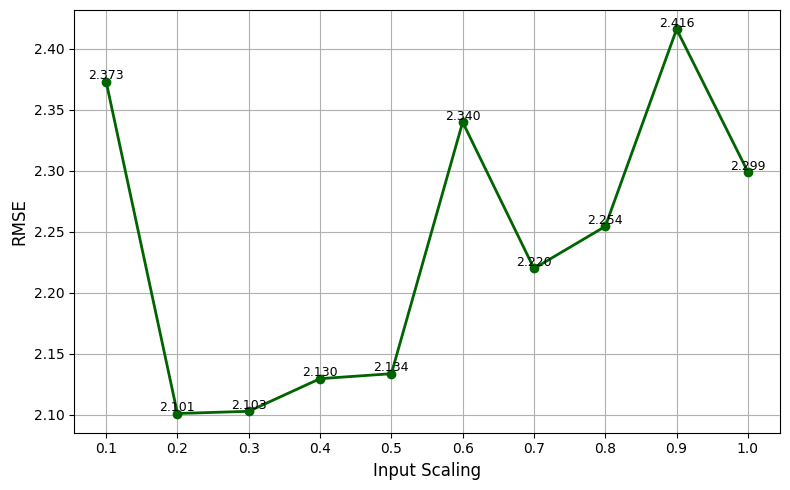

In [98]:

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ
plt.figure(figsize=(8, 5))
plt.plot(in_scaling, rmses, marker='o', linestyle='-', linewidth=2, color='darkgreen')

# Œ§ŒØœÑŒªŒøœÇ Œ∫Œ±Œπ Œ¨ŒæŒøŒΩŒµœÇ
#plt.title("ŒïœÄŒØŒ¥œÅŒ±œÉŒ∑ œÑŒøœÖ Input Scaling œÉœÑŒø RMSE", fontsize=14)
plt.xlabel("Input Scaling", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

# Œ†œÅŒøœÉŒ∏ŒÆŒ∫Œ∑ œÑŒπŒºœéŒΩ RMSE œÄŒ¨ŒΩœâ Œ±œÄœå Œ∫Œ¨Œ∏Œµ œÉŒ∑ŒºŒµŒØŒø
for i, rmse in enumerate(rmses):
    plt.text(in_scaling[i], rmse + 0.002, f"{rmse:.3f}", ha='center', fontsize=9)

# Styling
plt.grid(True)
plt.xticks(in_scaling)
plt.tight_layout()
plt.show()

## ŒîŒøŒ∫ŒπŒºŒ¨Œ∂ŒøœÖŒºŒµ Œ¥ŒπŒ¨œÜŒøœÅŒµœÇ œÑŒπŒºŒ≠œÇ Œ≥ŒπŒ± œÑŒøŒΩ Œ±œÅŒπŒ∏Œºœå œÑœâŒΩ nodes Œ≥ŒπŒ± ŒΩŒ± Œ≤œÅŒøœçŒºŒµ œÑŒ∑ŒΩ Œ≤Œ≠ŒªœÑŒπœÉœÑŒ∑ 


In [118]:
## ŒöŒ±Œ∏ŒøœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒ∑ŒΩ ŒªŒØœÉœÑŒ± œÖœÄŒøœàŒÆœÜŒπœâŒΩ nodes œÑŒπŒºœéŒΩ
nodes = [50,80,100,200,300,400,500,600,700,800]
#nodes=[1300,1400,1500,1600,1700,1800,1900,2000]

## ŒòŒ≠ŒªŒøœÖŒºŒµ ŒΩŒ± Œ¥ŒøœçŒºŒµ œÄœéœÇ Œ∑ Œ±œÄœåŒ¥ŒøœÉŒ∑ œÑŒøœÖ ESN (ŒºŒµœÑœÅŒøœçŒºŒµŒΩŒ∑ œâœÇ RMSE œÉœÑŒø training set) Œ±ŒªŒªŒ¨Œ∂ŒµŒπ Œ∫Œ±Œ∏œéœÇ Œ±ŒªŒªŒ¨Œ∂ŒøœÖŒºŒµ œÑŒø œÄŒªŒÆŒ∏ŒøœÇ œÑœâŒΩ ŒΩŒµœÖœÅœéŒΩœâŒΩ (nodes) œÉœÑŒø ŒµœÉœâœÑŒµœÅŒπŒ∫œå reservoir.

## ŒõŒπŒ≥œåœÑŒµœÅŒøŒπ Œ∫œåŒºŒ≤ŒøŒπ ‚Üí ŒºŒπŒ∫œÅœåœÑŒµœÅŒ∑ œáœâœÅŒ∑œÑŒπŒ∫œåœÑŒ∑œÑŒ± ŒºŒΩŒÆŒºŒ∑œÇ, ŒªŒπŒ≥œåœÑŒµœÅŒø œÄŒøŒªœçœÄŒªŒøŒ∫Œø ŒºŒøŒΩœÑŒ≠ŒªŒø

## Œ†ŒµœÅŒπœÉœÉœåœÑŒµœÅŒøŒπ Œ∫œåŒºŒ≤ŒøŒπ ‚Üí œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒ∑ œáœâœÅŒ∑œÑŒπŒ∫œåœÑŒ∑œÑŒ±, Œ±ŒªŒªŒ¨ Œ∫Œ±Œπ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÖœÄŒµœÅŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑œÇ ŒÆ ŒºŒµŒ≥Œ±ŒªœçœÑŒµœÅŒø Œ∫œåœÉœÑŒøœÇ œÖœÄŒøŒªŒøŒ≥ŒπœÉŒºŒøœç

In [255]:
# ŒïŒ¥œé Œ∏Œ± Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçœÉŒøœÖŒºŒµ œÑŒ± RMSE Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ ŒºŒ≠Œ≥ŒµŒ∏ŒøœÇ
rmses = []

# ŒíœÅœåœáŒøœÇ œÄŒ¨ŒΩœâ œÉŒµ Œ∫Œ¨Œ∏Œµ Œ±œÅŒπŒ∏Œºœå Œ∫œåŒºŒ≤œâŒΩ
for i in range(len(nodes)):
    n_nodes = nodes[i]  # œÑœÅŒ≠œáŒøœÖœÉŒ± œÑŒπŒºŒÆ hidden_layer_size

    # 1) ŒüœÅŒπœÉŒºœåœÇ œÑŒøœÖ ŒºœÄŒªŒøŒ∫ ŒµŒπœÉœåŒ¥ŒøœÖ ŒºŒµ n_nodes ŒΩŒµœÖœÅœéŒΩŒµœÇ
    base_input_to_nodes = InputToNode(
        hidden_layer_size=n_nodes,       # œÄŒªŒÆŒ∏ŒøœÇ ŒΩŒµœÖœÅœéŒΩœâŒΩ
        input_activation='identity',     # œáœâœÅŒØœÇ ŒºŒ∑-Œ≥œÅŒ±ŒºŒºŒπŒ∫œåœÑŒ∑œÑŒ± œÉœÑŒ∑ŒΩ ŒµŒØœÉŒøŒ¥Œø
        k_in=1,                          # œÄŒªŒÆœÅŒ∑œÇ œÉœçŒΩŒ¥ŒµœÉŒ∑ input ‚Üí Œ∫Œ¨Œ∏Œµ ŒΩŒµœÖœÅœéŒΩŒ±
        input_scaling=0.8,               # œÉœÑŒ±Œ∏ŒµœÅŒÆ Œ∫ŒªŒπŒºŒ¨Œ∫œâœÉŒ∑ ŒµŒπœÉœåŒ¥ŒøœÖ
        bias_scaling=0.0                 # œáœâœÅŒØœÇ bias
    )

    # 2) ŒüœÅŒπœÉŒºœåœÇ œÑŒøœÖ ŒºœÄŒªŒøŒ∫ ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫œéŒΩ œÉœÖŒΩŒ¥Œ≠œÉŒµœâŒΩ (reservoir)
    base_nodes_to_nodes = NodeToNode(
        hidden_layer_size=n_nodes,  # ŒØŒ¥ŒπŒø œÄŒªŒÆŒ∏ŒøœÇ ŒΩŒµœÖœÅœéŒΩœâŒΩ
        spectral_radius=0.3,        # œÉœÑŒ±Œ∏ŒµœÅŒÆ œÜŒ±œÉŒºŒ±œÑŒπŒ∫ŒÆ Œ±Œ∫œÑŒØŒΩŒ±
        leakage=0.2,                # œÉœÑŒ±Œ∏ŒµœÅŒÆ Œ¥ŒπŒ±œÅœÅŒøŒÆ ŒºŒΩŒÆŒºŒ∑œÇ
        k_rec=10,                   # 10 œÑœÖœáŒ±ŒØŒµœÇ ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ¥Œ≠œÉŒµŒπœÇ Œ±ŒΩŒ¨ ŒΩŒµœÖœÅœéŒΩŒ±
              
    )

    # 3) ŒöŒ±œÑŒ±œÉŒ∫ŒµœÖŒÆ ESNRegressor ŒºŒµ Ridge read‚Äêout
    esn = ESNRegressor(
        input_to_node=base_input_to_nodes,
        node_to_node=base_nodes_to_nodes,
        regressor=Ridge(alpha=1e-8)  # œÄŒøŒªœç ŒµŒªŒ±œÜœÅŒπŒ¨ Œ∫Œ±ŒΩŒøŒΩŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑
    )

    
     # ŒïŒ∫œÄŒ±ŒπŒ¥ŒµœçŒøœÖŒºŒµ œÑŒø ESN œÄŒ¨ŒΩœâ œÉœÑŒø training set
    esn.fit(train_set, y_train)
    
    # Œ†Œ±œÅŒ¨Œ≥ŒøœÖŒºŒµ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ Œ≥ŒπŒ± œÑŒø ŒØŒ¥ŒπŒø training set
    predictions = esn.predict(train_set)
    
    # Œ•œÄŒøŒªŒøŒ≥ŒØŒ∂ŒøœÖŒºŒµ œÑŒø MSE Œ∫Œ±Œπ Œ≠œÄŒµŒπœÑŒ± œÑŒø RMSE
    MSE = mean_squared_error(predictions,y_train)
    rmse = math.sqrt(MSE)
        
    # ŒïŒ∫œÑœÖœÄœéŒΩŒøœÖŒºŒµ Œ∫Œ±Œπ Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçŒøœÖŒºŒµ œÑŒø RMSE
    #ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ Œ∫Œ±Œπ Œ±œÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ œÑŒøœÖ Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒøœÇ
    print(f"n_nodes={n_nodes} ‚Üí RMSE={rmse:.20f}")
    rmses.append(rmse)

n_nodes=50 ‚Üí RMSE=4.22867393466683161307
n_nodes=80 ‚Üí RMSE=3.85177355747815264309
n_nodes=100 ‚Üí RMSE=3.59951054894788535776
n_nodes=200 ‚Üí RMSE=3.04744768481383010439
n_nodes=300 ‚Üí RMSE=2.75413280019437367585
n_nodes=400 ‚Üí RMSE=2.21998031486572955373
n_nodes=500 ‚Üí RMSE=2.13368993687899832778
n_nodes=600 ‚Üí RMSE=2.09470587936324514899
n_nodes=700 ‚Üí RMSE=1.95662427093769153430
n_nodes=800 ‚Üí RMSE=1.85010837545966322359


## ŒßœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒºŒµ œÑŒ∑ŒΩ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ œÄŒøœÖ Œ≤œÅŒØœÉŒ∫ŒµŒπ œÑŒ∑ŒΩ œÑŒπŒºŒÆ ŒºŒµ œÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø œÉœÜŒ¨ŒªŒºŒ± Œ∫Œ±Œπ œÑŒøŒΩ index œÑŒ∑œÇ

In [120]:
minimum, index = find_min_with_index(rmses)

# Œ§œéœÅŒ± Œ≠œáŒµŒπœÇ Œ∫Œ±Œπ œÑŒ∑ŒΩ œÑŒπŒºŒÆ Œ∫Œ±Œπ œÑŒø index Œ≠Œæœâ Œ±œÄœå œÑŒ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑
print("Œó ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒµŒØŒΩŒ±Œπ:", minimum)
print("Œó Œ∏Œ≠œÉŒ∑ œÑŒ∑œÇ ŒµŒØŒΩŒ±Œπ:", index)
print("Œ§Œ± nodes œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ ŒµŒØŒΩŒ±Œπ:", nodes[index])

Œó ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒµŒØŒΩŒ±Œπ: 1.8776323605521155
Œó Œ∏Œ≠œÉŒ∑ œÑŒ∑œÇ ŒµŒØŒΩŒ±Œπ: 9
Œ§Œ± nodes œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ ŒµŒØŒΩŒ±Œπ: 800


## ŒìœÅŒ¨œÜŒ∑ŒºŒ± œÄŒøœÖ Œ¥ŒµŒØœáŒΩŒµŒπ œÄŒøœÉŒø ŒºŒµœÑŒ±Œ≤Œ¨ŒªŒµœÑŒ±Œπ œÑŒø œÉœÜŒ¨ŒªŒºŒ± ŒºŒµ Œ≤Œ¨œÉŒ∑ œÑœâŒΩ Œ±œÅŒπŒ∏ŒºœéŒΩ œÑœâŒΩ Œ∫œåŒºŒ≤œâŒΩ œÄŒøœÖ ŒµœÄŒπŒªŒ≠œáŒ∏Œ∑Œ∫Œµ

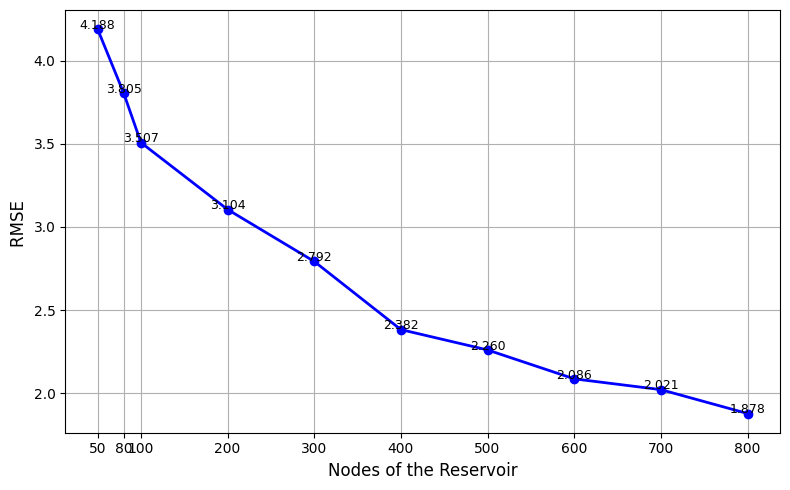

In [121]:
plt.figure(figsize=(8, 5))  # ŒöŒ±Œ∏Œ±œÅœå ŒºŒ≠Œ≥ŒµŒ∏ŒøœÇ Œ≥ŒπŒ± œÄŒ±œÅŒøœÖœÉŒØŒ±œÉŒ∑
plt.plot(nodes, rmses, marker='o', linestyle='-', linewidth=2, color='blue')

# Œ†œÅŒøœÉŒ∏ŒÆŒ∫Œ∑ œÑŒØœÑŒªŒøœÖ Œ∫Œ±Œπ Œ±ŒæœåŒΩœâŒΩ
#plt.title("ŒïœÄŒØŒ¥œÅŒ±œÉŒ∑ œÑŒøœÖ Œ±œÅŒπŒ∏ŒºŒøœç Œ∫œåŒºŒ≤œâŒΩ (Nodes) œÉœÑŒø RMSE", fontsize=14)
plt.xlabel("Nodes of the Reservoir", fontsize=12)
plt.ylabel("RMSE ", fontsize=12)

# Œ†œÅŒøŒ±ŒπœÅŒµœÑŒπŒ∫Œ¨: ŒµŒºœÜŒ¨ŒΩŒπœÉŒ∑ œÑŒπŒºœéŒΩ RMSE œÄŒ¨ŒΩœâ œÉœÑŒ± œÉŒ∑ŒºŒµŒØŒ±
for i, rmse in enumerate(rmses):
    plt.text(nodes[i], rmses[i] + 0.002, f"{rmse:.3f}", ha='center', fontsize=9)

plt.grid(True)
plt.xticks(nodes)
plt.tight_layout()
plt.show()

# Œ£Œµ Œ±œÖœÑœå œÑŒø Œ≤ŒÆŒºŒ± Œ¥ŒπŒ±ŒºŒøœÅœÜœéŒΩŒøœÖŒºŒµ œÑŒ∑ŒΩ Œ±œÅœáŒπœÑŒµŒ∫œÑŒøŒΩŒπŒ∫ŒÆ œÑŒøœÖ Echo State Network, Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥œéŒΩœÑŒ±œÇ:
## Œ§Œø ŒºœÄŒªŒøŒ∫ ŒµŒπœÉœåŒ¥ŒøœÖ (InputToNode) œÄŒøœÖ œáŒ±œÅœÑŒøŒ≥œÅŒ±œÜŒµŒØ Œ∫Œ±Œπ Œ∫ŒªŒπŒºŒ±Œ∫œéŒΩŒµŒπ œÑŒπœÇ ŒµŒæœâœÑŒµœÅŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ œÉœÑŒø reservoir.
## Œ§Œø ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫œå ŒºœÄŒªŒøŒ∫ (NodeToNode) œÄŒøœÖ ŒøœÅŒØŒ∂ŒµŒπ œÑŒ∑ Œ¥œÖŒΩŒ±ŒºŒπŒ∫ŒÆ Œ∫Œ±Œπ œÑŒπœÇ ŒµœÉœâœÑŒµœÅŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ¥Œ≠œÉŒµŒπœÇ œÑŒøœÖ reservoir.
## Œ§ŒøŒΩ œÑŒµŒªŒπŒ∫œå ESNRegressor, œÉœÖŒΩŒ¥œÖŒ¨Œ∂ŒøŒΩœÑŒ±œÇ œÑŒ± Œ¥œçŒø blocks ŒºŒµ Œ≠ŒΩŒ±ŒΩ Œ≥œÅŒ±ŒºŒºŒπŒ∫œå Ridge read-out, Œ≠œÑŒøŒπŒºŒø ŒΩŒ± ŒµŒ∫œÄŒ±ŒπŒ¥ŒµœÖœÑŒµŒØ.

In [136]:
# ŒüœÅŒπœÉŒºœåœÇ œÑŒøœÖ ŒºœÄŒªŒøŒ∫ ŒµŒπœÉœåŒ¥ŒøœÖ (Input ‚Üí Reservoir)
base_input_to_nodes = InputToNode(
    hidden_layer_size=800,   # reservoir ŒºŒµ 1000 ŒΩŒµœÖœÅœéŒΩŒµœÇ
    input_activation='identity',  # Œ∑ ŒµŒØœÉŒøŒ¥ŒøœÇ œÄŒµœÅŒΩŒ¨ŒµŒπ Œ±œÖœÑŒøœçœÉŒπŒ±, œáœâœÅŒØœÇ ŒºŒ∑-Œ≥œÅŒ±ŒºŒºŒπŒ∫ŒÆ ŒµŒΩŒµœÅŒ≥ŒøœÄŒøŒØŒ∑œÉŒ∑
    k_in=1,                       # Œ∫Œ¨Œ∏Œµ Œ¥ŒπŒ¨œÉœÑŒ±œÉŒ∑ ŒµŒπœÉœåŒ¥ŒøœÖ œÉœÖŒΩŒ¥Œ≠ŒµœÑŒ±Œπ ŒºŒµ Œ∫Œ¨Œ∏Œµ ŒΩŒµœÖœÅœéŒΩŒ±
    input_scaling=0.2,            # Œ∫ŒªŒπŒºŒ±Œ∫œéŒΩŒµŒπ œÑŒ∑ŒΩ ŒπœÉœáœç œÑŒøœÖ œÉŒÆŒºŒ±œÑŒøœÇ ŒµŒπœÉœåŒ¥ŒøœÖ œÉœÑŒø 0.4
    bias_scaling=0.0              # Œ¥ŒµŒΩ œÄœÅŒøœÉœÑŒØŒ∏ŒµœÑŒ±Œπ ŒµœÄŒπœÄŒªŒ≠ŒøŒΩ bias
)

# ŒüœÅŒπœÉŒºœåœÇ œÑŒøœÖ ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫Œøœç ŒºœÄŒªŒøŒ∫ (Reservoir ‚Üí Reservoir)
base_nodes_to_nodes = NodeToNode(
    hidden_layer_size=800,  # ŒØŒ¥ŒπŒ± Œ¥ŒπŒ¨œÉœÑŒ±œÉŒ∑ reservoir: 1000 ŒΩŒµœÖœÅœéŒΩŒµœÇ
    spectral_radius=0.3,     # œÜŒ±œÉŒºŒ±œÑŒπŒ∫ŒÆ Œ±Œ∫œÑŒØŒΩŒ± Œ≥ŒπŒ± œÉœÑŒ±Œ∏ŒµœÅœåœÑŒ∑œÑŒ± œÑŒ∑œÇ Œ¥œÖŒΩŒ±ŒºŒπŒ∫ŒÆœÇ
    leakage=0.8,             # œÅœÖŒ∏ŒºœåœÇ "Œ¥ŒπŒ±œÅœÅŒøŒÆœÇ" ŒºŒΩŒÆŒºŒ∑œÇ œÑœâŒΩ ŒΩŒµœÖœÅœéŒΩœâŒΩ
    k_rec=10                # Œ∫Œ¨Œ∏Œµ ŒΩŒµœÖœÅœéŒΩŒ±œÇ Œ≠œáŒµŒπ 10 œÑœÖœáŒ±ŒØŒµœÇ ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ¥Œ≠œÉŒµŒπœÇ
)

# Œ£œÖŒΩŒ¥œÖŒ±œÉŒºœåœÇ œÉŒµ ESNRegressor ŒºŒµ Ridge read-out
esn = ESNRegressor(
    input_to_node=base_input_to_nodes,      # œÑŒø ŒºœÄŒªŒøŒ∫ ŒµŒπœÉœåŒ¥ŒøœÖ œÄŒøœÖ ŒøœÅŒØœÉŒ±ŒºŒµ
    node_to_node=base_nodes_to_nodes,       # œÑŒø ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫œå ŒºœÄŒªŒøŒ∫
    regressor=Ridge(alpha=1e-8)             # Œ≥œÅŒ±ŒºŒºŒπŒ∫œåœÇ read-out ŒºŒµ œÄŒøŒªœç ŒµŒªŒ±œÜœÅŒπŒ¨ Œ∫Œ±ŒΩŒøŒΩŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑
)

## ŒïŒªŒ≠Œ≥œáŒøœÖŒºŒµ œÄŒøŒπœå ŒµŒØŒΩŒ±Œπ œÑŒø Œ∫Œ±œÑŒ±ŒªœÖŒªœåœÑŒµœÅŒø input window Œ≥ŒπŒ± œÑŒø œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒ± Œ≤ŒÆŒºŒ±œÑŒ± œÉœÑŒøŒΩ œáœÅœåŒΩŒø œÑŒøœÖ target œÄŒøœÖ Œ∏Œ≠ŒªŒøœÖŒºŒµ ŒΩŒ± œÄœÅŒøŒ≤ŒªŒ≠œàŒøœÖŒºŒµ 

In [124]:
windows=[30,40,50,60,70,80,90,100]

In [125]:
def receive_multistep_training_sets(window, horizon):
    """
    ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒµŒØ œÉœçŒΩŒøŒªŒø ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑œÇ Œ≥ŒπŒ± multi-step forecasting.

    Œ†Œ±œÅŒ¨ŒºŒµœÑœÅŒøŒπ:
    ----------
    window : int
        ŒúŒÆŒ∫ŒøœÇ œÄŒ±œÅŒ±Œ∏œçœÅŒøœÖ ŒµŒπœÉœåŒ¥ŒøœÖ (œÄ.œá. 50)
    horizon : int
        Œ†ŒªŒÆŒ∏ŒøœÇ Œ≤Œ∑ŒºŒ¨œÑœâŒΩ ŒºœÄœÅŒøœÉœÑŒ¨ Œ≥ŒπŒ± œÄœÅœåŒ≤ŒªŒµœàŒ∑ (œÄ.œá. 140)

    ŒïœÄŒπœÉœÑœÅŒ≠œÜŒµŒπ:
    ----------
    X_ins : np.ndarray, shape = (n_samples, window)
        Œ§Œ± œÄŒ±œÅŒ±Œ∏œÖœÅŒπŒ∫Œ¨ input sequences.

    y_targets : np.ndarray, shape = (n_samples, horizon)
        Œ§Œ± Œ±ŒΩœÑŒØœÉœÑŒøŒπœáŒ± target sequences.

    prices : np.ndarray, shape = (n_samples,)
        Œ§ŒµŒªŒµœÖœÑŒ±ŒØŒ± œÑŒπŒºŒÆ Œ∫Œ¨Œ∏Œµ œÄŒ±œÅŒ±Œ∏œçœÅŒøœÖ ŒµŒπœÉœåŒ¥ŒøœÖ (œáœÅŒÆœÉŒπŒºŒ∑ Œ≥ŒπŒ± denormalization).
    """

    X_ins = []
    y_targets = []
    prices = []

    total_window = window + horizon  # œÑŒø œÉœÖŒΩŒøŒªŒπŒ∫œå slice œÄŒøœÖ Œ±œÄŒ±ŒπœÑŒµŒØœÑŒ±Œπ

    for i in range(len(df) - total_window + 1):
        # Œ†Œ±ŒØœÅŒΩŒøœÖŒºŒµ œÉœÖŒΩŒµœáŒ≠œÇ œÄŒ±œÅŒ¨Œ∏œÖœÅŒø window+horizon
        seq_full = df['x'].iloc[i : i + total_window].reset_index(drop=True)

        # ŒïŒØœÉŒøŒ¥ŒøœÇ: œÄœÅœéœÑŒµœÇ `window` œÑŒπŒºŒ≠œÇ
        seq_input = seq_full[:window]
        X_ins.append(np.round(np.array(seq_input), 5))

        # Œ£œÑœåœáŒøœÇ: ŒøŒπ ŒµœÄœåŒºŒµŒΩŒµœÇ `horizon` œÑŒπŒºŒ≠œÇ
        seq_target = seq_full[window:]
        y_targets.append(np.round(np.array(seq_target), 5))

        # Œ§ŒµŒªŒµœÖœÑŒ±ŒØŒ± œÑŒπŒºŒÆ ŒµŒπœÉœåŒ¥ŒøœÖ Œ≥ŒπŒ± normalization ŒÆ Œ≠ŒªŒµŒ≥œáŒø
        prices.append(seq_input.iloc[-1])

    # ŒúŒµœÑŒ±œÑœÅŒøœÄŒÆ œÉŒµ œÄŒØŒΩŒ±Œ∫ŒµœÇ NumPy
    X_ins = np.array(X_ins)
    y_targets = np.array(y_targets)
    prices = np.array(prices)

    return X_ins, y_targets, prices

In [126]:
def train(X_ins, y_targets, prices):
    esn.fit(X_ins,y_targets)

    
    predictions = esn.predict (X_ins)

        
    MSE = mean_squared_error(predictions,y_targets)
    rmse = math.sqrt(MSE)
    
    return rmse

In [127]:
# ŒüœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒø œÄŒªŒÆŒ∏ŒøœÇ œÑœâŒΩ Œ≤Œ∑ŒºŒ¨œÑœâŒΩ œÄœÅœåŒ≤ŒªŒµœàŒ∑œÇ (œÄ.œá. 10 ŒµœÄœåŒºŒµŒΩŒµœÇ œÑŒπŒºŒ≠œÇ)
horizon = 140

# ŒëœÅœáŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ ŒªŒØœÉœÑŒ±œÇ Œ≥ŒπŒ± Œ±œÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ œÑœâŒΩ RMSEs
rmses = []

# ŒíœÅœåœáŒøœÇ œÄŒ¨ŒΩœâ œÉœÑŒ± œÖœÄŒøœàŒÆœÜŒπŒ± ŒºŒµŒ≥Œ≠Œ∏Œ∑ œÄŒ±œÅŒ±Œ∏œçœÅŒøœÖ
for window in windows:
    try:
        # ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± training set ŒºŒµ multi-step œÉœÑœåœáŒøœÖœÇ
        train_set, y_train, prev = receive_multistep_training_sets(window, horizon)

        # ŒëŒΩ Œ¥ŒµŒΩ œÖœÄŒ¨œÅœáŒøœÖŒΩ Œ±œÅŒ∫ŒµœÑŒ¨ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ±, œÄŒ±œÅŒ¨ŒªŒµŒπœàŒ∑
        if len(train_set) == 0:
            print(f"Œ†Œ±œÅŒ¨ŒªŒµŒπœàŒ∑ window={window} (insufficient data)")
            continue

        # ŒïŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ Œ∫Œ±Œπ œÖœÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ œÉœÜŒ¨ŒªŒºŒ±œÑŒøœÇ
        rmse = train(train_set, y_train, prev)

        # ŒïŒ∫œÑœçœÄœâœÉŒ∑ Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒøœÇ
        print(f"window={window} -> RMSE={rmse:.15f}")

        # ŒöŒ±œÑŒ±Œ≥œÅŒ±œÜŒÆ
        rmses.append(rmse)

    except Exception as e:
        print(f"‚ö†Ô∏è Œ£œÜŒ¨ŒªŒºŒ± œÉœÑŒø window={window}: {e}")
        continue

window=30 -> RMSE=2.046873932623513
window=40 -> RMSE=2.079173580606342
window=50 -> RMSE=2.215499039931935
window=60 -> RMSE=2.227236678071224
window=70 -> RMSE=2.223360804530913
window=80 -> RMSE=2.256927840537667
window=90 -> RMSE=2.189713866071967
window=100 -> RMSE=2.182475881102184


In [128]:
def find_min_with_index(lst):
    if not lst:
        raise ValueError("Œó ŒªŒØœÉœÑŒ± ŒµŒØŒΩŒ±Œπ Œ∫ŒµŒΩŒÆ")

    minimum = lst[0]
    min_index = 0

    for i in range(1, len(lst)):  # üëà i goes from 1 to len(lst) - 1
        if lst[i] < minimum:
            minimum = lst[i]
            min_index = i
    return minimum, min_index

In [129]:
minimum, index = find_min_with_index(rmses)

# Œ§œéœÅŒ± Œ≠œáŒµŒπœÇ Œ∫Œ±Œπ œÑŒ∑ŒΩ œÑŒπŒºŒÆ Œ∫Œ±Œπ œÑŒø index Œ≠Œæœâ Œ±œÄœå œÑŒ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑
print("Œó ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒµŒØŒΩŒ±Œπ:", minimum)
print("Œó Œ∏Œ≠œÉŒ∑ œÑŒ∑œÇ ŒµŒØŒΩŒ±Œπ:", index)
print("Œ§Œø window œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ ŒµŒØŒΩŒ±Œπ:", windows[index])

Œó ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒµŒØŒΩŒ±Œπ: 2.0468739326235132
Œó Œ∏Œ≠œÉŒ∑ œÑŒ∑œÇ ŒµŒØŒΩŒ±Œπ: 0
Œ§Œø window œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ ŒµŒØŒΩŒ±Œπ: 30


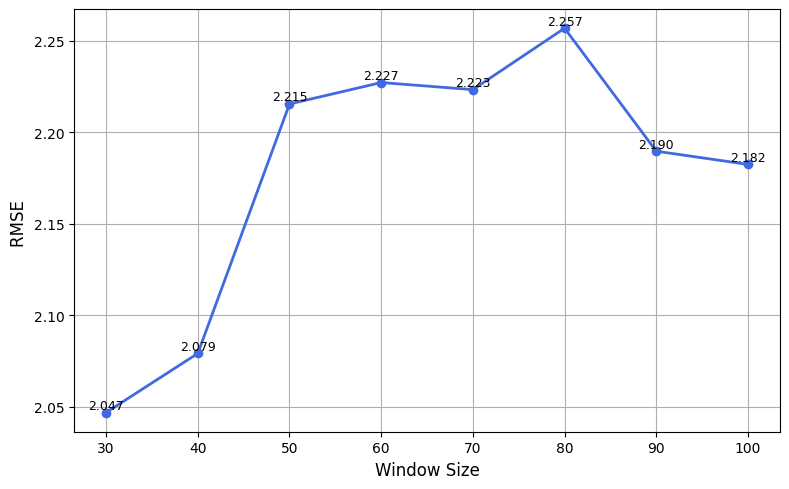

In [130]:
# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÑŒøœÖ Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ
plt.figure(figsize=(8, 5))
plt.plot(windows, rmses, marker='o', linestyle='-', linewidth=2, color='royalblue')

# Œ§ŒØœÑŒªŒøœÇ Œ∫Œ±Œπ Œ¨ŒæŒøŒΩŒµœÇ
#plt.title("ŒïœÄŒØŒ¥œÅŒ±œÉŒ∑ œÑŒøœÖ ŒºŒÆŒ∫ŒøœÖœÇ œÄŒ±œÅŒ±Œ∏œçœÅŒøœÖ œÉœÑŒø RMSE", fontsize=14)
plt.xlabel("Window Size", fontsize=12)
plt.ylabel("RMSE ", fontsize=12)

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ œÑŒπŒºœéŒΩ RMSE œÄŒ¨ŒΩœâ Œ±œÄœå Œ∫Œ¨Œ∏Œµ œÉŒ∑ŒºŒµŒØŒø
for i, rmse in enumerate(rmses):
    plt.text(windows[i], rmse + 0.002, f"{rmse:.3f}", ha='center', fontsize=9)

# Œ£œÑœÖŒª Œ∫Œ±Œπ ŒºŒøœÅœÜŒøœÄŒøŒØŒ∑œÉŒ∑
plt.grid(True)
plt.xticks(windows)
plt.tight_layout()
plt.show()

## Œ†Œ±œÅŒ¨Œ≥ŒµŒπ training Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± Œ≥ŒπŒ± Œ≠ŒΩŒ± ŒºŒøŒΩœÑŒ≠ŒªŒø (œÄ.œá. ESN) œÄŒøœÖ œÄœÅŒøŒ≤ŒªŒ≠œÄŒµŒπ œÑŒπœÇ ŒµœÄœåŒºŒµŒΩŒµœÇ 140 œÑŒπŒºŒ≠œÇ œÑŒ∑œÇ œáœÅŒøŒΩŒøœÉŒµŒπœÅŒ¨œÇ x, œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπœéŒΩœÑŒ±œÇ œÑŒø Œ≤Œ≠ŒªœÑŒπœÉœÑŒø œÄŒ±œÅŒ¨Œ∏œÖœÅŒø œÄŒ±œÅŒµŒªŒ∏œåŒΩœÑŒøœÇ Œ¥Œ∑ŒªŒ±Œ¥ŒÆ  œÑŒπœÇ œÄœÅŒøŒ∑Œ≥ŒøœçŒºŒµŒΩŒµœÇ 30

In [137]:

y_targets = list()
X_ins = list()
prices = list()

# Œ†Œ±œÅŒ¨ŒºŒµœÑœÅŒøŒπ
input_window = 30
forecast_horizon = 140

for i in range(len(df)):
    end = i + input_window + forecast_horizon
    if end > len(df):
        break  # ŒëŒΩ Œ¥ŒµŒΩ Œ≠œáŒøœÖŒºŒµ Œ±œÅŒ∫ŒµœÑŒ¨ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± Œ≥ŒπŒ± full œÄŒ±œÅŒ¨Œ∏œÖœÅŒø

    # ŒüŒªœåŒ∫ŒªŒ∑œÅŒø œÑŒø œÄŒ±œÅŒ¨Œ∏œÖœÅŒø: input + forecast
    seq_full = df['x'].iloc[i:end].reset_index(drop=True)

    # ŒïŒØœÉŒøŒ¥ŒøœÇ: ŒøŒπ œÄœÅœéœÑŒµœÇ 30 œÑŒπŒºŒ≠œÇ
    seq_input = seq_full[:input_window]
    X_ins.append(np.round(np.array(seq_input), 5))

    # Œ£œÑœåœáŒøœÇ: ŒøŒπ ŒµœÄœåŒºŒµŒΩŒµœÇ 140 œÑŒπŒºŒ≠œÇ
    seq_target = seq_full[input_window:]  # Œ¥Œ∑ŒªŒ±Œ¥ŒÆ Œ∏Œ≠œÉŒµŒπœÇ 50‚Äì189
    y_targets.append(np.round(np.array(seq_target), 5))

    # ŒìŒπŒ± normalization (œÄœÅŒøŒ±ŒπœÅŒµœÑŒπŒ∫Œ¨)
    prices.append(seq_input.iloc[-1])

X = np.array(X_ins)           # shape = (n_samples, 30)
Y = np.array(y_targets)       # shape = (n_samples, 140)

In [236]:
#ŒîŒπŒ±œáœâœÅŒπœÉŒºœåœÇ œÉŒµ training set Œ∫Œ±Œπ test set
ts = round(len(X)*0.8)
#inputs

# œÑŒø œÄœÅœéœÑŒø 80% train set Œ∫Œ±Œπ œÑŒø œÖœÄœåŒªŒøŒπœÄŒø test set
train_set = X[:ts]
test_set = X[ts:]

#outputs

y_train = y_targets[:ts]
y_test = y_targets[ts:]

# Œø ŒªœåŒ≥ŒøœÇ œÄŒøœÖ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒºŒµ numpy vectors ŒµŒØŒΩŒ±Œπ Œ≥ŒπŒ±œÑŒØ œÄŒøŒªŒªŒ≠œÇ Œ≤ŒπŒ≤ŒªŒπŒøŒÆŒ∫ŒµœÇ ML œÑŒ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒΩ
y_train = np.array(y_train)
y_test = np.array(y_test)
prices = np.array(prices)           # œÉœáŒÆŒºŒ± = (49152,)
prices_train = prices[len(y_train):]  # œÄ.œá. 49152 train samples
prices_test  = prices[:len(y_test)]  # œÄ.œá.  9830 test samples


# Training set

# EŒ∫œÄŒ±ŒπŒ¥ŒµœçŒøœÖŒºŒµ œÑŒø Reservoir ŒºŒ±œÇ œÉœÑŒø Training set

In [238]:
# ŒïŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ (fit) œÑŒøœÖ ESN œÉœÑŒø training set
#   - Œ§Œø ESN ¬´ŒºŒ±Œ∏Œ±ŒØŒΩŒµŒπ¬ª œÑŒøŒΩ Œ≥œÅŒ±ŒºŒºŒπŒ∫œå read-out (Ridge) Œ≤Œ±œÉŒπŒ∂œåŒºŒµŒΩŒø œÉœÑŒπœÇ Œ∫Œ±œÑŒ±œÉœÑŒ¨œÉŒµŒπœÇ œÑŒøœÖ reservoir
#   - ŒßœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒµŒØ train_set (X) Œ∫Œ±Œπ y_train (œÉœÑœåœáŒøœÖœÇ) Œ≥ŒπŒ± ŒΩŒ± œÖœÄŒøŒªŒøŒ≥ŒØœÉŒµŒπ œÑŒ± Œ∫Œ±œÑŒ¨ŒªŒªŒ∑ŒªŒ± Œ≤Œ¨œÅŒ∑
esn.fit(train_set,y_train)

# Œ†œÅœåŒ≤ŒªŒµœàŒ∑ (predict) œÑŒøœÖ ŒØŒ¥ŒπŒøœÖ training set
#   - ŒúŒµœÑŒ¨ œÑŒ∑ŒΩ ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑, œÄŒ±œÅŒ¨Œ≥ŒµŒπ œÑŒπœÇ œÑŒπŒºŒ≠œÇ œÄŒøœÖ ¬´œÄŒπœÉœÑŒµœçŒµŒπ¬ª œåœÑŒπ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒøœçŒΩ œÉœÑŒ± train_set
#   - ŒëœÄŒøŒ∏Œ∑Œ∫ŒµœçŒøœÖŒºŒµ œÑŒø Œ±œÄŒøœÑŒ≠ŒªŒµœÉŒºŒ± œÉŒµ predictions_train
predictions_train = esn.predict(train_set)

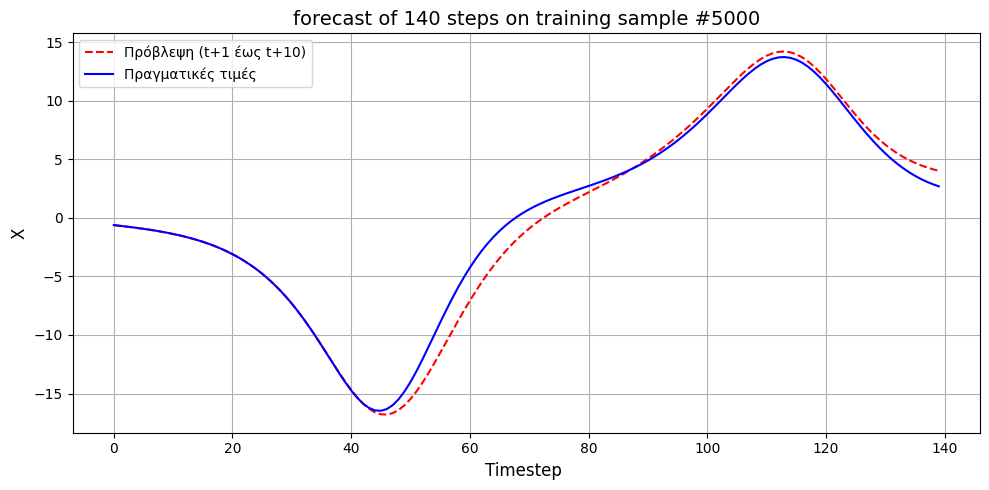

In [239]:
sample_index =5000


# ŒïœÄŒØŒªŒµŒæŒµ œÑŒø Œ¥ŒµŒØŒ≥ŒºŒ± œÄŒøœÖ Œ∏Œ≠ŒªŒµŒπœÇ ŒΩŒ± œÄœÅŒøŒ≤Œ¨ŒªŒªŒµŒπœÇ (œÄ.œá. Œ¥ŒµŒØŒ≥ŒºŒ± #10)
horizon = len(predictions_train[sample_index])  # œÄ.œá. 10 ŒÆ 800
time_steps = np.arange(1, horizon+1)           # [1,2,3,‚Ä¶,horizon]
xtick_positions = np.arange(1, horizon+1, 19)  # [0,50,100,‚Ä¶,900]
# ŒîŒπŒ¨ŒªŒµŒæŒµ Œ¥ŒµŒØŒ≥ŒºŒ± Œ±œÄœå œÑŒø test set (œÄ.œá. œÑŒø 10Œø Œ¥ŒµŒØŒ≥ŒºŒ± ŒºŒ≠œÉŒ± œÉœÑŒø test set)

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÑŒøœÖ Œ¥ŒπŒ±Œ≥œÅŒ¨ŒºŒºŒ±œÑŒøœÇ
plt.figure(figsize=(10, 5))

# Œ†œÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ Œ≥ŒπŒ± t+1 Œ≠œâœÇ t+10
plt.plot(
    predictions_train[sample_index],
    label='Œ†œÅœåŒ≤ŒªŒµœàŒ∑ (t+1 Œ≠œâœÇ t+10)',
    linestyle='--',
    #marker='o',
    #lw=5,
    color='red'
)

# Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ Œ≥ŒπŒ± t+1 Œ≠œâœÇ t+10
plt.plot(
    y_train[sample_index],
    label='Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ',
    linestyle='-',
    #marker='x',
    #lw=5,
    color='blue'
)

# ŒîŒπŒ±ŒºœåœÅœÜœâœÉŒ∑ Œ∫Œ±Œπ ŒµœÄŒµŒæŒ∑Œ≥ŒÆœÉŒµŒπœÇ
plt.title(f'forecast of 140 steps on training sample #{sample_index}', fontsize=14)
plt.xlabel('Timestep ', fontsize=12)
plt.ylabel('X', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



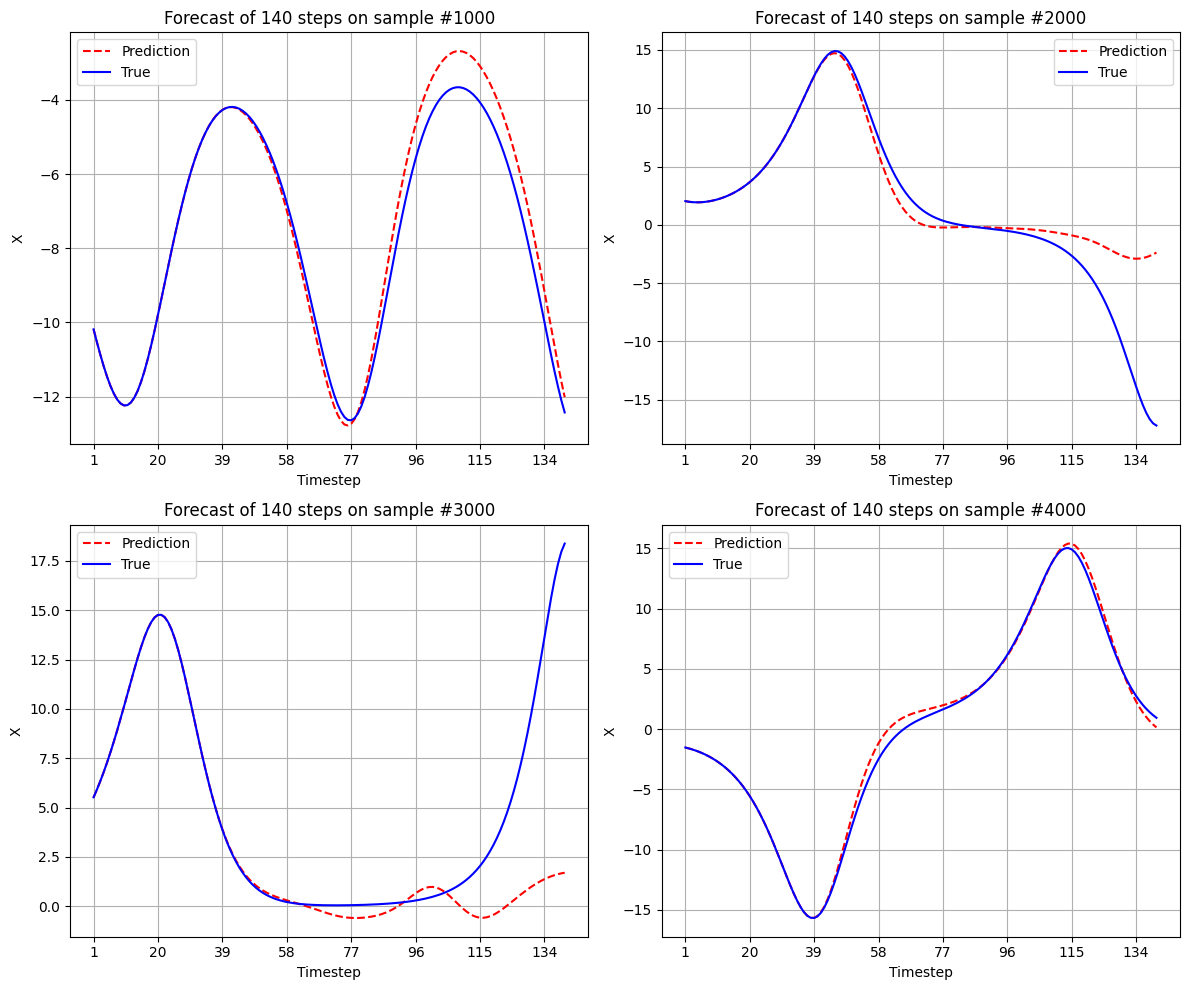

In [240]:

# Example sample indices
sample_indices = [1000, 2000, 3000, 4000]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, idx in zip(axes.flatten(), sample_indices):
    horizon = len(predictions_train[idx])          # forecast horizon (e.g., 140)
    time_steps = np.arange(1, horizon + 1)         # [1, 2, ‚Ä¶, horizon]
    xtick_positions = np.arange(1, horizon + 1, 19)  # tick every 19 steps

    # Plot predictions
    ax.plot(time_steps, predictions_train[idx], '--', color='red', label='Prediction')
    # Plot true values
    ax.plot(time_steps, y_train[idx], '-', color='blue', label='True')

    # Titles and labels
    ax.set_title(f'Forecast of {horizon} steps on sample #{idx}', fontsize=12)
    ax.set_xlabel('Timestep', fontsize=10)
    ax.set_ylabel('X', fontsize=10)
    ax.set_xticks(xtick_positions)
    ax.legend(fontsize=10)
    ax.grid(True)

plt.tight_layout()
plt.show()



## Test

## Œ†Œ±œÅŒ¨Œ≥ŒøœÖŒºŒµ œÑŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ± œÄŒøœÖ Œ≠Œ≤Œ≥Œ±ŒªŒµ œÑŒø Reservoir œÄŒ¨ŒΩœâ œÉŒµ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± œÄŒøœÖ Œ¥ŒµŒΩ ŒµŒØœáŒµ ŒµœÄŒØŒ≥ŒΩœâœÉŒ∑ Œ≥ŒπŒ± Œ±œÖœÑŒ¨ Œ∫Œ±Œπ œÑŒ± œÉœÖŒ≥Œ∫œÅŒØŒΩŒøœÖŒºŒµ ŒºŒµ œÑŒ± œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ¨ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ±

In [241]:
# Œ†Œ±œÅŒ¨Œ≥ŒøœÖŒºŒµ œÑŒπœÇ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ œÑŒøœÖ ESN Œ≥ŒπŒ± œÑŒ± ŒΩŒ≠Œ±, Œ±Œ∏Œ≠Œ±œÑŒ± Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± œÑŒøœÖ test set
predictions_test = esn.predict(test_set)

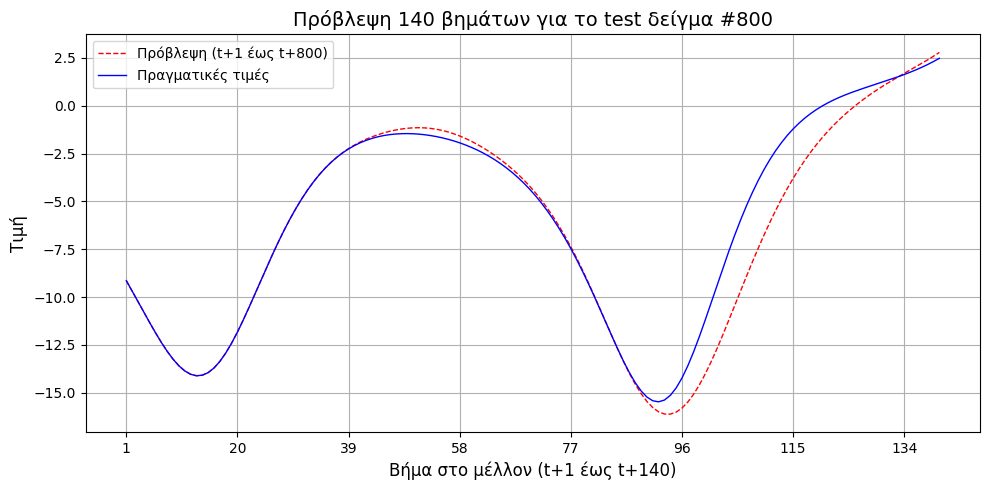

In [242]:
horizon = len(predictions_test[sample_index])  # œÄ.œá. 10 ŒÆ 800
time_steps = np.arange(1, horizon+1)           # [1,2,3,‚Ä¶,horizon]
xtick_positions = np.arange(1, horizon+1, 19)  # [0,50,100,‚Ä¶,900]
# ŒîŒπŒ¨ŒªŒµŒæŒµ Œ¥ŒµŒØŒ≥ŒºŒ± Œ±œÄœå œÑŒø test set (œÄ.œá. œÑŒø 10Œø Œ¥ŒµŒØŒ≥ŒºŒ± ŒºŒ≠œÉŒ± œÉœÑŒø test set)
sample_index =800


# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ
plt.figure(figsize=(10, 5))

# Œ†œÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ (10 Œ≤ŒÆŒºŒ±œÑŒ± œÉœÑŒø ŒºŒ≠ŒªŒªŒøŒΩ)
plt.plot(
    time_steps,
    predictions_test[sample_index],
    label='Œ†œÅœåŒ≤ŒªŒµœàŒ∑ (t+1 Œ≠œâœÇ t+800)',
    linestyle='--',
    #marker='o',
    linewidth=1,
    color='red'
)

# Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ (ground truth)
plt.plot(
    time_steps,
    y_test[sample_index],
    label='Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ',
    linestyle='-',
    #marker='x',
    linewidth=1,
    color='blue'
    
)
plt.xticks(
    ticks=xtick_positions,
    labels=[str(x) for x in xtick_positions],  # ŒÆ [f't+{x}' Œ≥ŒπŒ± t+0, t+50‚Ä¶]
    rotation=0
)

# ŒîŒπŒ±ŒºœåœÅœÜœâœÉŒ∑ Œ∫Œ±Œπ ŒµœÄŒµŒæŒ∑Œ≥ŒÆœÉŒµŒπœÇ
plt.title(f'Œ†œÅœåŒ≤ŒªŒµœàŒ∑ 140 Œ≤Œ∑ŒºŒ¨œÑœâŒΩ Œ≥ŒπŒ± œÑŒø test Œ¥ŒµŒØŒ≥ŒºŒ± #{sample_index}', fontsize=14)
plt.xlabel('ŒíŒÆŒºŒ± œÉœÑŒø ŒºŒ≠ŒªŒªŒøŒΩ (t+1 Œ≠œâœÇ t+140)', fontsize=12)
plt.ylabel('Œ§ŒπŒºŒÆ', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

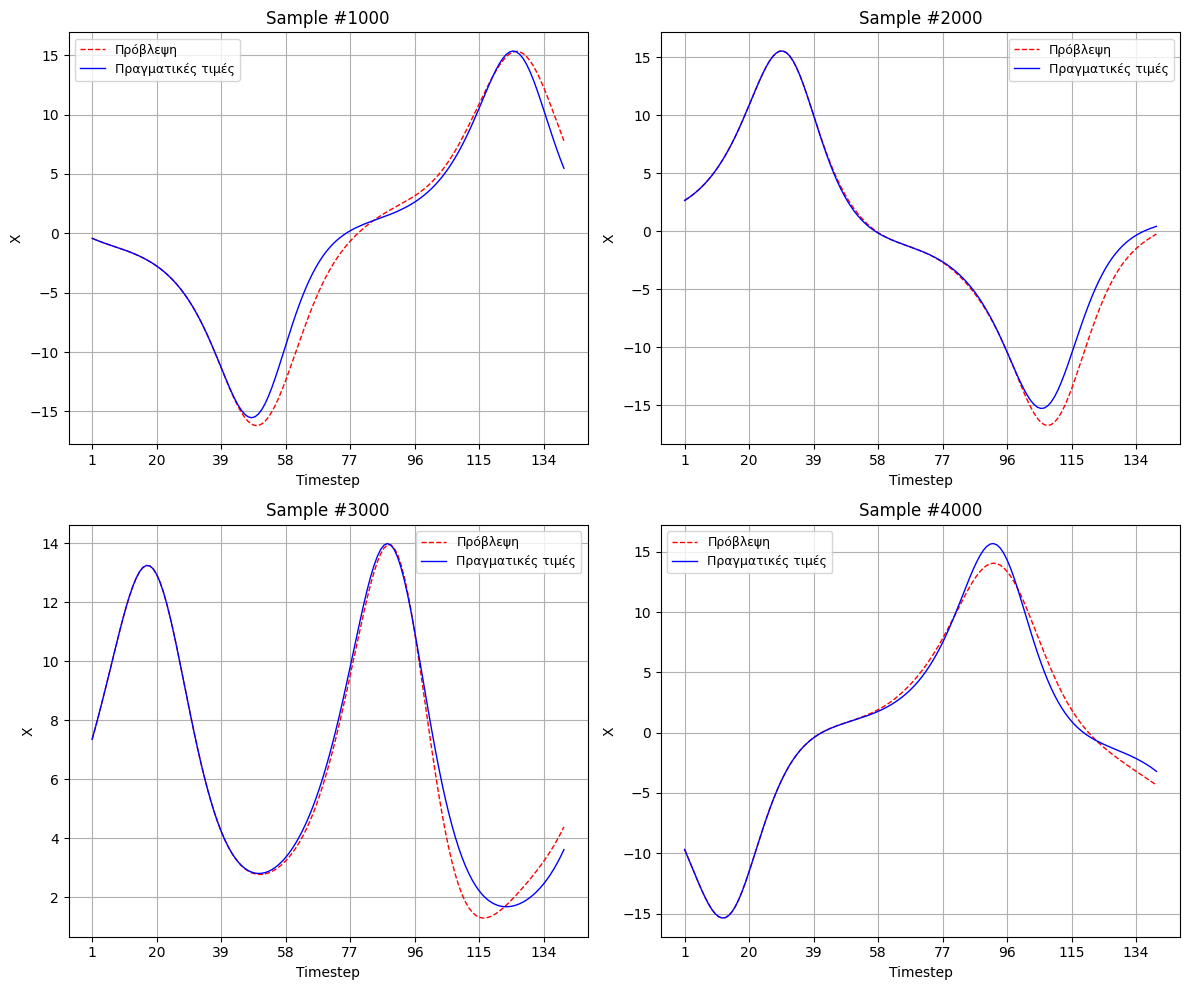

In [243]:
import numpy as np
import matplotlib.pyplot as plt

# Pick four sample indices you want to visualize
sample_indices = [1000, 2000, 3000, 4000]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, idx in zip(axes.flatten(), sample_indices):
    # compute horizon, time_steps and tick positions
    horizon = len(predictions_test[idx])  
    time_steps = np.arange(1, horizon + 1)
    xtick_positions = np.arange(1, horizon + 1, 19)

    # plot predictions
    ax.plot(
        time_steps,
        predictions_test[idx],
        '--',
        linewidth=1,
        color='red',
        label='Œ†œÅœåŒ≤ŒªŒµœàŒ∑'
    )
    # plot ground truth
    ax.plot(
        time_steps,
        y_test[idx],
        '-',
        linewidth=1,
        color='blue',
        label='Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ'
    )

    # set ticks every 19 steps
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels([str(x) for x in xtick_positions])
    ax.set_title(f'Sample #{idx}', fontsize=12)
    ax.set_xlabel('Timestep', fontsize=10)
    ax.set_ylabel('X', fontsize=10)
    ax.grid(True)
    ax.legend(fontsize=9)

plt.tight_layout()
plt.show()


## Calculation of RMSE on the above samples

In [245]:
#### nato deijw gia na to sizitisoume
mse = mean_squared_error(y_test.flatten(), predictions_test.flatten())
rmse = np.sqrt(mse)
print(rmse)

119.21525207839223


In [246]:
#### nato deijw gia na to sizitisoume
mse = mean_squared_error(y_test[1000:].flatten(), predictions_test[1000:].flatten())
rmse = np.sqrt(mse)
print(rmse)

2.132167078935639


In [247]:
y = y_test[1000:].flatten()           # ŒÆ œåœÄŒøŒπŒø Œ¥ŒπŒ¨ŒΩœÖœÉŒºŒ± Œ∏Œ≠ŒªŒµŒπœÇ
sigma = np.std(y, ddof=0)      # œÑœÖœÄŒπŒ∫ŒÆ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑
print(f"Œ§œÖœÄŒπŒ∫ŒÆ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÑœâŒΩ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫œéŒΩ: œÉ = {sigma:.4f}")


Œ§œÖœÄŒπŒ∫ŒÆ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÑœâŒΩ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫œéŒΩ: œÉ = 7.9031


In [248]:
from sklearn.metrics import mean_squared_error
sample_indices = [1000, 2000, 3000, 4000]
for i in sample_indices :
    mse = mean_squared_error(y_test[i].flatten(), predictions_test[i].flatten())
    rmse = np.sqrt(mse)
    print(f"RMSE on sample {i} is : {rmse}")



RMSE on sample 1000 is : 1.200830377685757
RMSE on sample 2000 is : 1.076964860198652
RMSE on sample 3000 is : 0.45199286450741893
RMSE on sample 4000 is : 0.6876904938899376


In [249]:
# RMSE‚â™œÉ œÄŒøŒªœÖ Œ∫Œ±Œªœå ŒºŒøŒΩœÑŒ≠ŒªŒø(ŒºŒπŒ∫œÅŒ¨ œÉœÜŒ¨ŒªŒºŒ±œÑŒ± œÉŒµ œÉœáŒ≠œÉŒ∑ ŒºŒµ œÑŒ∑ œÜœÖœÉŒπŒ∫ŒÆ Œ¥ŒπŒ±Œ∫œçŒºŒ±ŒΩœÉŒ∑)
y = y_test.flatten()           # ŒÆ œåœÄŒøŒπŒø Œ¥ŒπŒ¨ŒΩœÖœÉŒºŒ± Œ∏Œ≠ŒªŒµŒπœÇ
sigma = np.std(y, ddof=0)      # œÑœÖœÄŒπŒ∫ŒÆ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑
print(f"Œ§œÖœÄŒπŒ∫ŒÆ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÑœâŒΩ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫œéŒΩ: œÉ = {sigma:.4f}")


Œ§œÖœÄŒπŒ∫ŒÆ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÑœâŒΩ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫œéŒΩ: œÉ = 7.9012


In [251]:
from sklearn.metrics import mean_squared_error
sample_indices = [1000, 2000, 3000, 4000]
for i in sample_indices :
    mse = mean_squared_error(y_test[i][1:50].flatten(), predictions_test[i][1:50].flatten())
    rmse = np.sqrt(mse)
    print(f"RMSE on sample {i} is : {rmse}")


RMSE on sample 1000 is : 0.20484405445348536
RMSE on sample 2000 is : 0.07329959755251156
RMSE on sample 3000 is : 0.007781678882781967
RMSE on sample 4000 is : 0.005526759291855082


##  This function computes the coefficient of determination R^2
 

In [252]:
from sklearn.metrics import r2_score
sample_indices = [1000, 2000, 3000, 4000]


for i in sample_indices :
    R=r2_score(y_test[i],predictions_test[i])
    print(f"The R^2 on sample {i} is {R}")

The R^2 on sample 1000 is 0.9787063394890652
The R^2 on sample 2000 is 0.9829380504269336
The R^2 on sample 3000 is 0.9878075974561934
The R^2 on sample 4000 is 0.9926753610827711


## ŒïŒ¥œé ŒµŒΩœÑŒøœÄŒØŒ∂ŒøœÖŒºŒµ Œ±œÄŒø œÄŒøŒπœå œÉŒ∑ŒºŒµŒØŒø Œ∫Œ±Œπ ŒºŒµœÑŒ± Œ∑ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ Œ±œÄŒø œÑŒ∑ŒΩ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫ŒÆ œÑŒπŒºŒÆ ŒæŒµœÄŒµœÅŒΩŒ¨ŒµŒπ œÑŒø 20% 

In [253]:
pe=[]
steps = []
forecast_horizon=140
for i in range(forecast_horizon):
    x=float(predictions_test[3000][i])
    y=float(y_test[3000][i])
    percent_error=abs((x-y)/y)
    if percent_error > 0.2:
        print(f"in {i} the deviation is more than 20% and exactlly {percent_error}")
        pe.append(percent_error)
        steps.append(i)
        


in 104 the deviation is more than 20% and exactlly 0.2054375363591835
in 105 the deviation is more than 20% and exactlly 0.2414252760578869
in 106 the deviation is more than 20% and exactlly 0.27773318243492323
in 107 the deviation is more than 20% and exactlly 0.31311953142495363
in 108 the deviation is more than 20% and exactlly 0.3461513011822271
in 109 the deviation is more than 20% and exactlly 0.375233942588079
in 110 the deviation is more than 20% and exactlly 0.39866717464526275
in 111 the deviation is more than 20% and exactlly 0.414728871020003
in 112 the deviation is more than 20% and exactlly 0.42179804951766464
in 113 the deviation is more than 20% and exactlly 0.4184959547504402
in 114 the deviation is more than 20% and exactlly 0.40384736069126764
in 115 the deviation is more than 20% and exactlly 0.37744189038266485
in 116 the deviation is more than 20% and exactlly 0.33956205109213683
in 117 the deviation is more than 20% and exactlly 0.2912275275766713
in 118 the devi

## Directional Accuracy

In [117]:
# ŒüœÅŒπœÉŒºœåœÇ œÑœâŒΩ œÄŒπŒΩŒ¨Œ∫œâŒΩ Œ≥ŒπŒ± Œ≠ŒªŒµŒ≥œáŒø Œ∫Œ±œÑŒµœçŒ∏œÖŒΩœÉŒ∑œÇ
real        = y_test                # œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ-œÉœÑœåœáŒøŒπ
predictions = predictions_test      # œÄœÅŒøŒ≤ŒªŒµœÄœåŒºŒµŒΩŒµœÇ œÑŒπŒºŒ≠œÇ ESN
prev        = np.array(prices[ts:]) # œÑŒµŒªŒµœÖœÑŒ±ŒØŒ± œÑŒπŒºŒÆ Œ∫Œ¨Œ∏Œµ window Œ≥ŒπŒ± œÑŒø test set

# ŒëœÅœáŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ ŒºŒµœÑœÅŒ∑œÑŒÆ œÉœâœÉœÑœéŒΩ œÄœÅŒøŒ≤ŒªŒ≠œàŒµœâŒΩ Œ∫Œ±œÑŒµœçŒ∏œÖŒΩœÉŒ∑œÇ
number = 0

# ŒìŒπŒ± Œ∫Œ¨Œ∏Œµ Œ¥ŒµŒØŒ≥ŒºŒ± i, ŒµŒªŒ≠Œ≥œáŒøœÖŒºŒµ Œ±ŒΩ œÑŒø ŒºŒøŒΩœÑŒ≠ŒªŒø ŒºŒ¨ŒΩœÑŒµœàŒµ œÉœâœÉœÑŒ¨ œÑŒ∑ŒΩ Œ±ŒΩŒøŒ¥ŒπŒ∫ŒÆ/Œ∫Œ±Œ∏ŒøŒ¥ŒπŒ∫ŒÆ Œ∫ŒØŒΩŒ∑œÉŒ∑
number = 0
total  = len(real) * forecast_horizon

for i in range(len(real)):             # Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ sample
    for k in range(forecast_horizon):  # Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ Œ≤ŒÆŒºŒ± t+k
        rt   = real[i, k]
        pr   = predictions[i, k]
        base = prev[i]
        if (rt > base and pr > base) or (rt < base and pr < base):
            number += 1

trues = number / total
print("Overall directional accuracy:", trues)






Overall directional accuracy: 0.9698955018491442
